In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import pandas as pd
import pyreadr as pyr
pd.set_option('display.max_rows',None)

# what datasets do we have results for?

In [2]:
ls ../output

15000_by_300/ 40000_by_300/ 40000_by_50/  README.md


# helper functions

In [3]:
def plot_loadings(L):
    f, ax = plt.subplots(figsize=(25,7))
    _max = max(abs(np.min(L)),abs(np.max(L)))
    p = ax.imshow(L,aspect="auto",interpolation='nearest',cmap="seismic",vmax=_max,vmin=-_max)
    plt.colorbar(p,ax=ax)
    return ax

In [4]:
def print_extreme_words(L,words,n=50):
    #print list of n most extreme words in each factor
    for k in range(L.shape[1]):
        print("k =",k)
        idx = np.argsort(L[:,k])
        d = pd.DataFrame(data={
            "lowest words":words[idx][:n],
            "lowest value":L[idx,k][:n],
            "highest words":words[idx][-n:][::-1],
            "highest value":L[idx,k][-n:][::-1]
                          }
                    )
        display(d)

In [5]:
def get_filenames(dim,truncatenum,prior,backfit = False):
    matrixfile = f"../output/{truncatenum}_by_{dim}/{truncatenum}_by_{dim}_{prior}_backfit_{str(backfit).upper()}_L.csv"
    wordsfile = f"../output/{truncatenum}_by_{dim}/{truncatenum}_by_{dim}_words.csv"
    return matrixfile,wordsfile

In [6]:
def view_results(matrixfile,wordsfile,n=50,k=10):
    #read in data
    L = np.genfromtxt(matrixfile)[:,:k]
    words = np.genfromtxt(wordsfile,dtype=str,comments=None)
    print(L.shape)
    print(words.shape)
    #make plot
    plt.show(plot_loadings(L))
    #print list of n most extreme words in each factor
    print_extreme_words(L,words,n)
    #return L and words
    return L,words

# 40,000 words, 50 dimensions

(40000, 10)
(40000,)


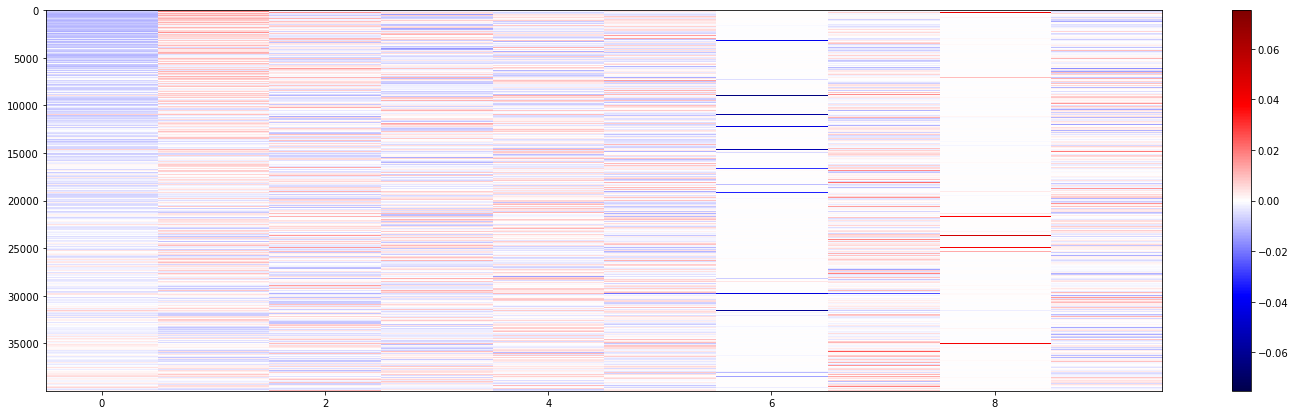

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.016811,20003,0.010941
1,their,-0.016663,dehr,0.009733
2,some,-0.016440,vih,0.009484
3,these,-0.016380,wuh,0.009414
4,any,-0.016283,202-887-8307,0.009352
5,they,-0.016155,pehr,0.008952
6,are,-0.016056,jih,0.008718
7,have,-0.016036,kur,0.008590
8,countries,-0.016017,suhn,0.008582
9,our,-0.015993,puh,0.008225


k = 1


,lowest words,lowest value,highest words,highest value
0,282-942,-0.014933,minister,0.020155
1,http://www.nasdaq.com,-0.014742,former,0.018647
2,herein,-0.014334,leader,0.018501
3,microscopic,-0.012987,secretary,0.018165
4,hushen,-0.012556,president,0.018038
5,coating,-0.012400,deputy,0.017808
6,droplets,-0.012318,chief,0.017281
7,coatings,-0.012300,chairman,0.016976
8,organisms,-0.012168,told,0.016947
9,polymers,-0.012166,appointed,0.016885


k = 2


,lowest words,lowest value,highest words,highest value
0,mehn,-0.017806,cents,0.021027
1,yahng,-0.015786,cac-40,0.019650
2,vah,-0.015168,1/4,0.019049
3,kaht,-0.014981,km,0.018922
4,meddling,-0.014511,bushel,0.018388
5,discredit,-0.014494,gallon,0.018365
6,condone,-0.013849,3/4,0.018060
7,voh,-0.013624,stoxx,0.017383
8,heinous,-0.013135,0.9,0.017121
9,rahk,-0.013135,1/8,0.017058


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4480,-0.018210,arbil,0.016808
1,guitar,-0.017467,pkk,0.016167
2,732-390-4697,-0.017410,kyrgyzstan,0.015426
3,funny,-0.016024,burundian,0.015412
4,vocals,-0.015908,puntland,0.015403
5,piano,-0.015860,tajik,0.015390
6,guy,-0.015807,dushanbe,0.015320
7,matt,-0.015330,nagorno,0.015298
8,andy,-0.015161,eritrean,0.015289
9,comedy,-0.015057,stah,0.015154


k = 4


,lowest words,lowest value,highest words,highest value
0,212-556-4204,-0.026367,nahn,0.028950
1,404-526-5456,-0.022917,vah,0.022049
2,202-383-7824,-0.022110,rih,0.019153
3,nonsubscribers,-0.021139,rained,0.018192
4,http://www.nyse.com,-0.018909,dool,0.017981
5,202-887-8316,-0.018828,zuh,0.017666
6,zacks,-0.018779,nahr,0.017630
7,ieee,-0.018188,pounded,0.017556
8,peer-reviewed,-0.017418,torrential,0.016698
9,research,-0.016427,streaked,0.016668


k = 5


,lowest words,lowest value,highest words,highest value
0,shoh,-0.021648,located,0.018754
1,bahd,-0.020741,cemetery,0.018508
2,zah,-0.017924,noctuidae,0.018458
3,non-families,-0.017505,village,0.018020
4,1min,-0.017440,ancient,0.017818
5,yahn,-0.016315,medieval,0.017718
6,deficit,-0.016311,chapel,0.017167
7,earnings,-0.016150,parish,0.017115
8,http://www.nasdaq.com,-0.015769,temples,0.017009
9,hahr,-0.015348,47-42-17-11,0.016971


k = 6


,lowest words,lowest value,highest words,highest value
0,hahm,-0.075286,worldsources,0.050702
1,yahd,-0.073968,tduncan,0.035976
2,zah,-0.073232,podlaskie,0.034191
3,lah,-0.071546,non-swiss,0.028333
4,meel,-0.071483,kuyavian-pomeranian,0.027248
5,luh,-0.071291,householder,0.025339
6,ehn,-0.070914,łódź,0.024151
7,brah,-0.070696,arctiidae,0.020533
8,eed,-0.070655,east-central,0.020330
9,grah,-0.070319,816-822-1444,0.020075


k = 7


,lowest words,lowest value,highest words,highest value
0,fdch,-0.029546,sanskrit,0.030175
1,404-526-5456,-0.029527,verb,0.027927
2,kih,-0.026788,noun,0.027331
3,shoh,-0.026174,syllable,0.027119
4,sih,-0.025585,nouns,0.026875
5,grah,-0.024806,verbs,0.026656
6,tih,-0.023776,uml,0.026546
7,20003,-0.021027,rna,0.026364
8,uninsured,-0.021019,algebra,0.026083
9,zeez,-0.020763,λ,0.025725


k = 8


,lowest words,lowest value,highest words,highest value
0,nonsubscribers,-0.031061,816-822-8448,0.061028
1,unscom,-0.027172,householder,0.058808
2,telegram.com,-0.025944,0.23,0.052263
3,www.star,-0.024053,0.11,0.052046
4,globe.com,-0.021603,0.19,0.052028
5,masovian,-0.020926,topix,0.051831
6,play-offs,-0.020264,0.21,0.051822
7,rodong,-0.019282,0.31,0.051783
8,reactor,-0.018092,0.17,0.051776
9,pcb,-0.017999,0.14,0.051691


k = 9


,lowest words,lowest value,highest words,highest value
0,ammonium,-0.027635,http://www.nyse.com,0.034062
1,sarin,-0.027487,bihn,0.033427
2,202-887-8334,-0.025276,mahk,0.031577
3,melamine,-0.025036,dehl,0.029628
4,explosives,-0.023585,hahr,0.027550
5,fertilizer,-0.023244,winless,0.025562
6,qadeer,-0.023036,http://www.nytimes.com,0.025053
7,potassium,-0.022831,dehr,0.024525
8,detonators,-0.022791,tuh,0.023736
9,chemicals,-0.022373,www.star,0.023629


In [7]:
matrixfile,wordsfile = get_filenames(dim=50,truncatenum=40000,prior="point_normal")
Lpn,Wpn = view_results(matrixfile,wordsfile,n=10)

(40000, 10)
(40000,)


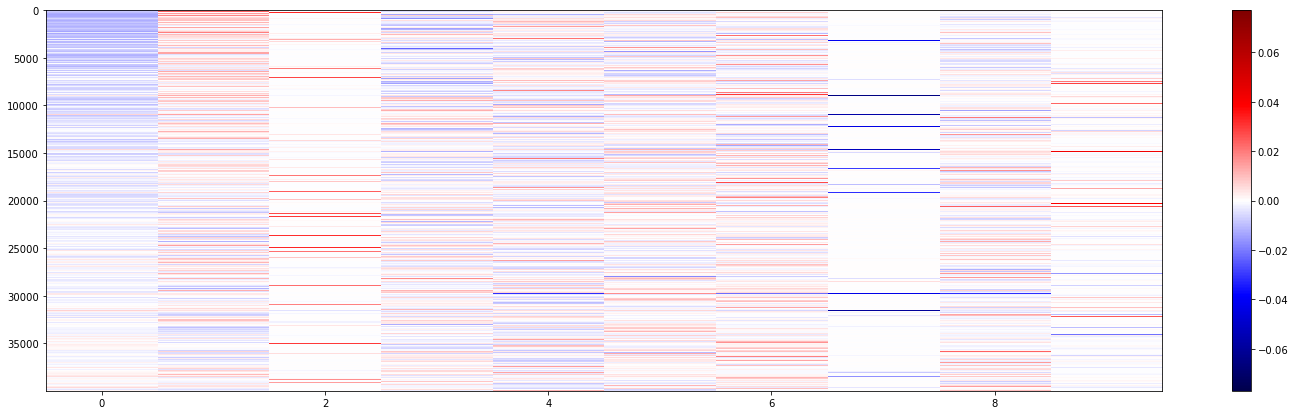

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.019475,20003,0.011090
1,their,-0.019282,vih,0.010106
2,some,-0.018946,dehr,0.009985
3,any,-0.018851,wuh,0.009614
4,these,-0.018803,202-887-8307,0.009168
5,they,-0.018725,pehr,0.008881
6,have,-0.018615,suhn,0.008658
7,countries,-0.018593,kur,0.008579
8,we,-0.018490,jih,0.008566
9,are,-0.018470,zahr,0.008251


k = 1


,lowest words,lowest value,highest words,highest value
0,282-942,-0.020299,minister,0.031029
1,herein,-0.018979,leader,0.026903
2,microscopic,-0.016960,president,0.025355
3,212-556-4204,-0.016750,secretary,0.025106
4,thickness,-0.016655,deputy,0.024799
5,http://www.nasdaq.com,-0.016365,former,0.023733
6,coating,-0.015969,gen.,0.023270
7,crustaceans,-0.015964,ambassador,0.022932
8,coatings,-0.015469,prime,0.022768
9,spherical,-0.015407,ousted,0.022766


k = 2


,lowest words,lowest value,highest words,highest value
0,nonsubscribers,-0.019171,cents,0.037295
1,vah,-0.018669,billion,0.035698
2,discredit,-0.014279,percent,0.034705
3,ehl,-0.013001,1.09,0.034678
4,plame,-0.012314,pesos,0.034334
5,kaht,-0.011738,1.07,0.034279
6,mahs,-0.011439,0.8,0.034133
7,embarrass,-0.009704,1.02,0.033929
8,mahm,-0.009642,1.08,0.033923
9,guh,-0.009524,1.22,0.033835


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4697,-0.027293,stah,0.023906
1,732-390-4480,-0.025673,nagorno,0.020260
2,jeff,-0.024524,bahs,0.019563
3,matt,-0.024068,kurds,0.019339
4,steve,-0.023980,pkk,0.019333
5,andy,-0.023941,eritrean,0.019176
6,williams,-0.023710,kurdish,0.019019
7,season,-0.023652,hutu,0.018792
8,scott,-0.023423,republika,0.018732
9,game,-0.023354,pna,0.018305


k = 4


,lowest words,lowest value,highest words,highest value
0,shoh,-0.031466,located,0.035864
1,rahk,-0.024395,railway,0.030897
2,bihn,-0.024004,situated,0.028887
3,voh,-0.021749,river,0.028657
4,yahn,-0.020695,coastal,0.027866
5,yahng,-0.020663,governorate,0.026059
6,remorse,-0.017589,municipality,0.026029
7,householder,-0.017385,basin,0.025351
8,thoughtful,-0.017347,oblast,0.025350
9,candid,-0.017260,northeast,0.025201


k = 5


,lowest words,lowest value,highest words,highest value
0,212-556-4204,-0.038558,nahn,0.049242
1,202-383-7824,-0.034815,vah,0.030707
2,404-526-5456,-0.032710,rained,0.027332
3,nonsubscribers,-0.029038,dool,0.027059
4,http://www.nyse.com,-0.027430,rih,0.025513
5,ieee,-0.026725,pounded,0.025467
6,202-887-8316,-0.025533,streaked,0.025196
7,not-for-profit,-0.025498,zuh,0.025134
8,zacks,-0.024654,tear,0.024510
9,peer-reviewed,-0.024465,batons,0.024470


k = 6


,lowest words,lowest value,highest words,highest value
0,grah,-0.031586,sanskrit,0.038061
1,worldsources,-0.026488,hymns,0.036188
2,warmian-masurian,-0.026124,poet,0.035952
3,bahd,-0.025544,poems,0.035571
4,gm,-0.023331,buddhist,0.034872
5,gmac,-0.022640,poetry,0.033910
6,e.on,-0.022340,mythology,0.033696
7,refineries,-0.022295,buddhism,0.033523
8,automaker,-0.021955,devotional,0.033446
9,shoh,-0.021933,poem,0.033316


k = 7


,lowest words,lowest value,highest words,highest value
0,hahm,-0.077084,worldsources,0.052650
1,yahd,-0.075500,tduncan,0.035466
2,zah,-0.074586,podlaskie,0.033267
3,ehn,-0.072897,non-swiss,0.026291
4,lah,-0.072652,kuyavian-pomeranian,0.026003
5,luh,-0.072301,łódź,0.023842
6,meel,-0.072078,east-central,0.020622
7,eed,-0.072014,kielce,0.019046
8,ahk,-0.071318,gastropod,0.018920
9,sih,-0.070838,masovian,0.018489


k = 8


,lowest words,lowest value,highest words,highest value
0,404-526-5456,-0.051320,tensor,0.041863
1,fdch,-0.038887,λ,0.038300
2,sih,-0.036737,equations,0.038008
3,kih,-0.034353,α,0.037623
4,shoh,-0.031588,ivica,0.036960
5,zeez,-0.027448,rna,0.035988
6,uninsured,-0.022214,integers,0.035950
7,yahn,-0.022204,algebra,0.035623
8,voh,-0.022118,γ,0.035396
9,mehn,-0.021752,uml,0.035395


k = 9


,lowest words,lowest value,highest words,highest value
0,chandra,-0.032452,1-0,0.056959
1,massoud,-0.026144,2-1,0.055930
2,hsiao,-0.025715,3-0,0.054748
3,truss,-0.025541,serie,0.053909
4,404-526-5887,-0.025332,4-0,0.053691
5,strobe,-0.025295,3-1,0.053332
6,taha,-0.024999,bundesliga,0.053247
7,rivlin,-0.024967,relegation,0.053210
8,m.,-0.024678,2-0,0.053176
9,shankar,-0.024231,sampdoria,0.053124


In [8]:
matrixfile,wordsfile = get_filenames(dim=50,truncatenum=40000,prior="point_laplace")
Lpl,Wpl = view_results(matrixfile,wordsfile ,n=10)

(40000, 10)
(40000,)


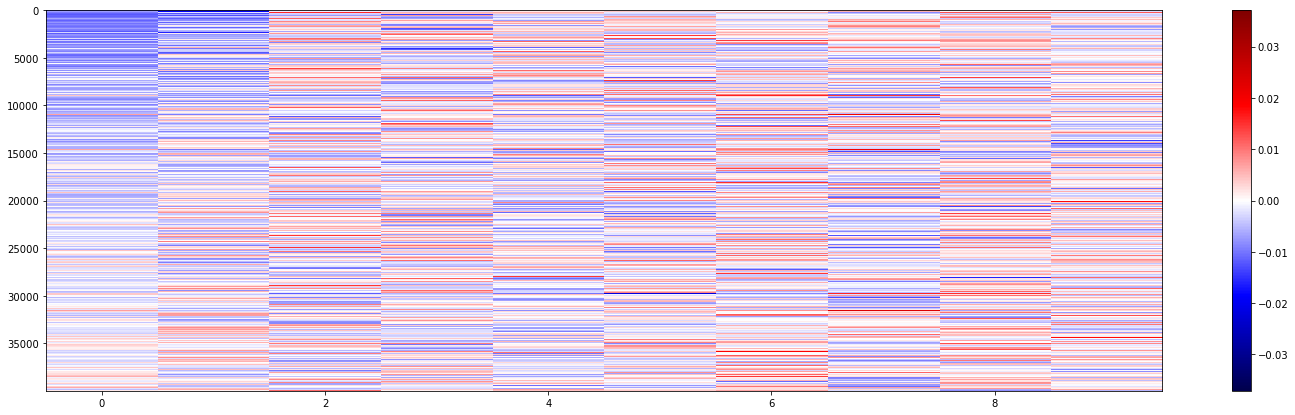

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.016784,20003,0.010961
1,their,-0.016629,dehr,0.009749
2,some,-0.016403,vih,0.009467
3,these,-0.016345,wuh,0.009401
4,any,-0.016252,202-887-8307,0.009337
5,they,-0.016121,pehr,0.008935
6,are,-0.016031,jih,0.008719
7,have,-0.016011,kur,0.008604
8,countries,-0.016009,suhn,0.008560
9,our,-0.015971,puh,0.008187


k = 1


,lowest words,lowest value,highest words,highest value
0,minister,-0.020170,282-942,0.014928
1,former,-0.018658,http://www.nasdaq.com,0.014748
2,leader,-0.018516,herein,0.014330
3,secretary,-0.018176,microscopic,0.012979
4,president,-0.018053,hushen,0.012545
5,deputy,-0.017816,coating,0.012395
6,chief,-0.017291,droplets,0.012313
7,chairman,-0.016982,coatings,0.012299
8,told,-0.016961,polymers,0.012162
9,appointed,-0.016893,organisms,0.012157


k = 2


,lowest words,lowest value,highest words,highest value
0,mehn,-0.017850,cents,0.021018
1,yahng,-0.015797,cac-40,0.019607
2,vah,-0.015194,1/4,0.019063
3,kaht,-0.014946,km,0.018876
4,meddling,-0.014556,bushel,0.018369
5,discredit,-0.014498,gallon,0.018348
6,condone,-0.013851,3/4,0.018072
7,voh,-0.013580,stoxx,0.017351
8,radovan,-0.013159,0.9,0.017068
9,heinous,-0.013150,1/8,0.017065


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4480,-0.018146,arbil,0.016813
1,guitar,-0.017470,pkk,0.016114
2,732-390-4697,-0.017347,kyrgyzstan,0.015388
3,funny,-0.016090,puntland,0.015374
4,vocals,-0.015931,burundian,0.015371
5,guy,-0.015845,tajik,0.015352
6,piano,-0.015843,dushanbe,0.015322
7,matt,-0.015309,nagorno,0.015242
8,andy,-0.015145,eritrean,0.015241
9,you,-0.015106,aceh,0.015068


k = 4


,lowest words,lowest value,highest words,highest value
0,nahn,-0.028982,212-556-4204,0.026478
1,vah,-0.022056,404-526-5456,0.022971
2,rih,-0.019185,202-383-7824,0.022203
3,rained,-0.018238,nonsubscribers,0.021132
4,dool,-0.017967,202-887-8316,0.018956
5,zuh,-0.017661,http://www.nyse.com,0.018863
6,nahr,-0.017617,zacks,0.018840
7,pounded,-0.017562,ieee,0.018134
8,streaked,-0.016679,peer-reviewed,0.017436
9,torrential,-0.016654,research,0.016428


k = 5


,lowest words,lowest value,highest words,highest value
0,shoh,-0.021662,located,0.018783
1,bahd,-0.020729,cemetery,0.018518
2,zah,-0.017938,noctuidae,0.018459
3,non-families,-0.017511,village,0.018049
4,1min,-0.017443,ancient,0.017851
5,yahn,-0.016328,medieval,0.017743
6,deficit,-0.016274,chapel,0.017181
7,earnings,-0.016107,parish,0.017131
8,http://www.nasdaq.com,-0.015784,temples,0.017032
9,hahr,-0.015361,47-42-17-11,0.016989


k = 6


,lowest words,lowest value,highest words,highest value
0,404-526-5456,-0.024434,rna,0.023098
1,fdch,-0.020236,uml,0.021412
2,worldsources,-0.019596,sanskrit,0.020846
3,evacuees,-0.015765,sbg,0.020463
4,uninsured,-0.015531,pah,0.020361
5,evacuate,-0.015346,vee,0.020081
6,1-732-390-4480,-0.015175,calculus,0.019947
7,20003,-0.015127,α,0.019922
8,nonessential,-0.014885,parf,0.019770
9,firefighters,-0.014612,subunit,0.019701


k = 7


,lowest words,lowest value,highest words,highest value
0,nikkei-225,-0.022536,grah,0.032980
1,225-issue,-0.020654,yuh,0.028295
2,non-swiss,-0.019327,fuh,0.027583
3,topix,-0.018118,luh,0.027355
4,cac-40,-0.017557,brah,0.026883
5,11-9,-0.016705,hahm,0.026119
6,chievo,-0.016491,jeh,0.024873
7,hungarians,-0.016242,wuh,0.024123
8,slavs,-0.015931,mahr,0.024022
9,tiebreak,-0.015881,kahr,0.023794


k = 8


,lowest words,lowest value,highest words,highest value
0,play-off,-0.018870,202-383-7824,0.028462
1,transverse,-0.018485,404-526-5456,0.021094
2,1-732-390-4480,-0.018316,sih,0.020212
3,ligament,-0.017608,ahb,0.019789
4,cruciate,-0.017201,dool,0.019742
5,20003,-0.016985,rupees,0.019402
6,igman,-0.016801,tael,0.018541
7,www.star,-0.016641,sahd,0.018118
8,rotor,-0.016566,non-families,0.018055
9,longitudinal,-0.016223,molested,0.017877


k = 9


,lowest words,lowest value,highest words,highest value
0,kaht,-0.037074,infection,0.024464
1,hushen,-0.028463,meningitis,0.024459
2,www.star,-0.027200,valea,0.024016
3,http://www.nytimes.com,-0.025506,creutzfeldt,0.023990
4,http://www.nyse.com,-0.025086,disease,0.023604
5,202-383-7824,-0.022900,infections,0.023550
6,212-556-4204,-0.022705,bacterial,0.023216
7,dehr,-0.022039,bacterium,0.023184
8,bihn,-0.021907,urinary,0.022658
9,dehl,-0.020577,diseases,0.022437


In [9]:
U_svd,W_svd = view_results("../output/40000_by_50/40000_by_50_svd_U.csv",wordsfile,n=10,k=10)

I thought point-exponential priors might be good, but doesn't work at least for for smaller dataset: 
```
Factor doesn't significantly increase objective and won't be added.
No factors have been added. Skipping nullcheck.
```

Overall, these reesults aren't super itneresting in part because they don't differ a ton from the SVD. However, it is finding "topics"

# 40,000 words, 300 dimensions

Seems a bit better with higher dimensions

(40000, 10)
(40000,)


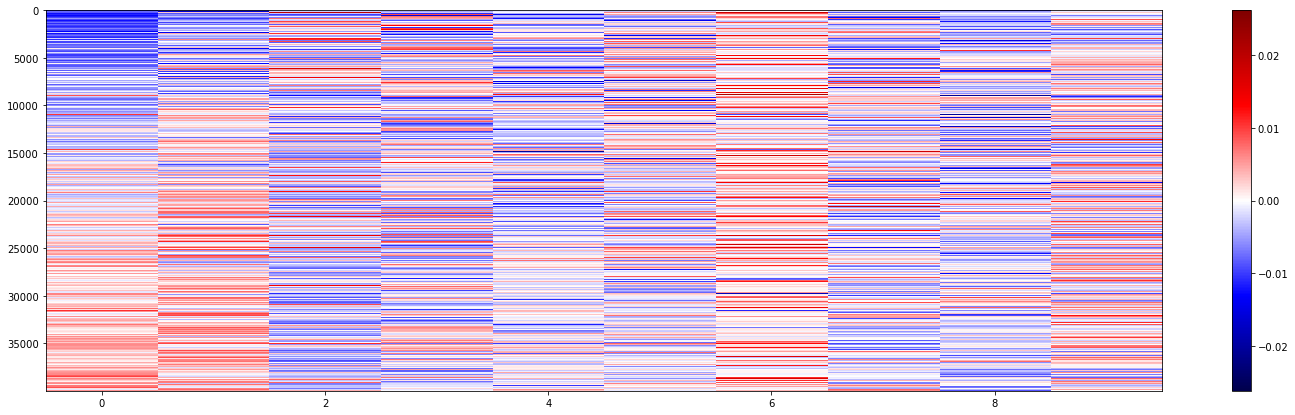

k = 0


,lowest words,lowest value,highest words,highest value
0,countries,-0.018236,zahr,0.013021
1,government,-0.017377,andya,0.012863
2,our,-0.017299,mahd,0.012789
3,economic,-0.017183,chah,0.012689
4,their,-0.016942,sahd,0.012558
5,any,-0.016864,sheh,0.012528
6,more,-0.016627,yahd,0.012486
7,we,-0.016362,fah,0.012446
8,have,-0.016303,puh,0.012216
9,its,-0.016295,jih,0.012192


k = 1


,lowest words,lowest value,highest words,highest value
0,john,-0.018068,non-families,0.016842
1,j.,-0.017808,http://www.nasdaq.com,0.013783
2,james,-0.017575,soluble,0.013673
3,jr.,-0.017435,stimuli,0.013572
4,thomas,-0.017288,neutrons,0.013420
5,william,-0.017268,receptors,0.013336
6,david,-0.017005,mixtures,0.013221
7,robert,-0.016949,membranes,0.013140
8,paul,-0.016859,wavelengths,0.013080
9,chairman,-0.016677,impedance,0.013072


k = 2


,lowest words,lowest value,highest words,highest value
0,feelings,-0.013781,cents,0.023279
1,sincerity,-0.013575,billion,0.021804
2,arrogant,-0.013542,km,0.021246
3,cynical,-0.013329,0.8,0.020555
4,sincere,-0.013091,0.4,0.020365
5,cowardly,-0.012950,%,0.019976
6,provocative,-0.012929,0.9,0.019732
7,demeanor,-0.012767,0.5,0.019671
8,hypocritical,-0.012757,0.7,0.019525
9,selfish,-0.012725,1.9,0.019403


k = 3


,lowest words,lowest value,highest words,highest value
0,minister,-0.016909,guitar,0.018129
1,hamid,-0.016449,beautiful,0.016337
2,mahmoud,-0.016236,album,0.016214
3,pna,-0.016035,features,0.015966
4,moslem,-0.015891,musical,0.015950
5,ministers,-0.015878,dark,0.015487
6,u.s.-led,-0.015796,piano,0.015369
7,hardline,-0.015730,comedy,0.015228
8,abbas,-0.015659,hair,0.015189
9,opposition,-0.015582,lovely,0.015157


k = 4


,lowest words,lowest value,highest words,highest value
0,1-0,-0.024728,sciences,0.015852
1,2-0,-0.024694,theological,0.015543
2,inning,-0.024546,non-profit,0.015422
3,seconds,-0.024476,202-887-8338,0.015257
4,1-1,-0.024104,architectural,0.014409
5,2-1,-0.024006,interdisciplinary,0.013974
6,3-0,-0.023910,not-for-profit,0.013972
7,3-1,-0.023816,linguistics,0.013841
8,2-2,-0.023549,humanities,0.013796
9,scored,-0.022915,archaeology,0.013625


k = 5


,lowest words,lowest value,highest words,highest value
0,outskirts,-0.021954,earnings,0.018840
1,villages,-0.020950,consumer,0.016630
2,kilometers,-0.020437,profit,0.016273
3,mosque,-0.020320,dividend,0.015997
4,gunmen,-0.020022,pretax,0.015969
5,kilometres,-0.019619,equity,0.015945
6,northern,-0.019425,securities,0.015781
7,nearby,-0.019197,transaction,0.015467
8,stronghold,-0.019152,index,0.015421
9,militants,-0.019144,analyst,0.015293


k = 6


,lowest words,lowest value,highest words,highest value
0,shoh,-0.018018,ordained,0.022918
1,tih,-0.017162,nobility,0.022431
2,brah,-0.016977,ecclesiastical,0.022394
3,mehd,-0.016818,1660,0.022168
4,shahm,-0.016730,christianity,0.021747
5,hahk,-0.016489,1603,0.021714
6,fuh,-0.015398,peerage,0.021675
7,grah,-0.015176,1815,0.021452
8,zhahn,-0.014891,theology,0.021419
9,kaht,-0.014877,prussia,0.021412


k = 7


,lowest words,lowest value,highest words,highest value
0,$,-0.019005,1-0,0.025551
1,husband,-0.018773,2-0,0.025370
2,wife,-0.018506,3-0,0.025215
3,pesos,-0.018230,play-off,0.024491
4,relatives,-0.017665,3-1,0.024313
5,children,-0.017357,2-1,0.024017
6,married,-0.016992,3-2,0.023971
7,tael,-0.016851,quarterfinal,0.023614
8,homes,-0.016829,4-2,0.022910
9,cents,-0.016778,semifinal,0.022694


k = 8


,lowest words,lowest value,highest words,highest value
0,ee,-0.026225,turmoil,0.014462
1,moh,-0.025577,lingering,0.014149
2,leed,-0.023151,gripped,0.013593
3,ah,-0.022556,surging,0.013560
4,moo,-0.022061,unsettled,0.013392
5,uh,-0.021688,recession,0.013267
6,nah,-0.020860,bleak,0.013135
7,mee,-0.020853,resurgent,0.013044
8,doh,-0.020813,prosperous,0.012903
9,ih,-0.020593,buffeted,0.012885


k = 9


,lowest words,lowest value,highest words,highest value
0,tael,-0.020924,probation,0.018149
1,asian,-0.018857,patients,0.018143
2,dehl,-0.018130,felony,0.017768
3,bihn,-0.018034,antibiotics,0.017765
4,www.star,-0.017533,medication,0.017507
5,sahd,-0.017515,spores,0.017232
6,nikkei-225,-0.017023,county,0.017128
7,thai,-0.016615,medically,0.017097
8,malaysian,-0.016578,psychiatric,0.016954
9,themed,-0.016431,bacteria,0.016765


In [10]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=40000,prior="point_normal")
Lpn,Wpn = view_results(matrixfile,wordsfile,n=10)

In [11]:
np.mean(Lpn < 0.001) #measure of "sparsity"

0.6130075

(40000, 10)
(40000,)


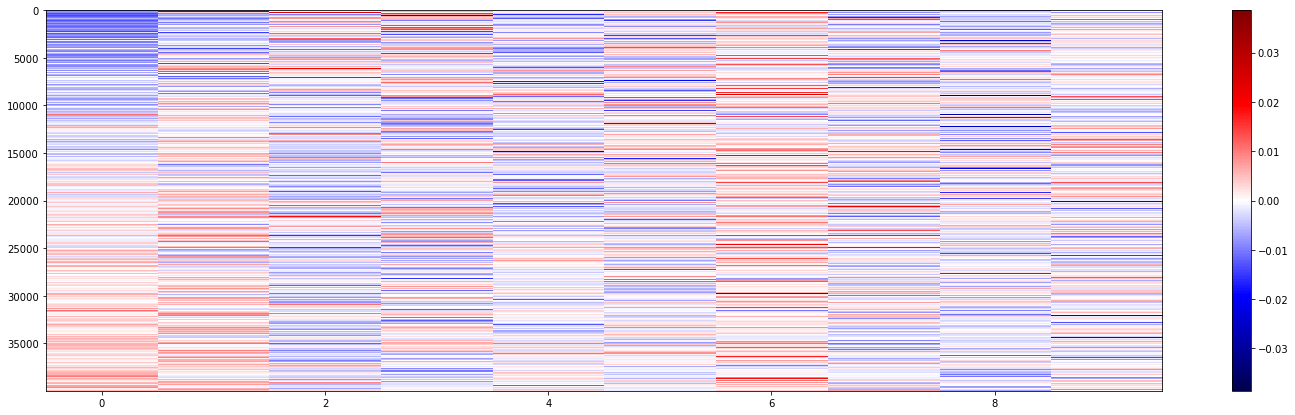

k = 0


,lowest words,lowest value,highest words,highest value
0,countries,-0.019628,zahr,0.013880
1,government,-0.018752,mahd,0.013525
2,our,-0.018589,andya,0.013469
3,economic,-0.018388,chah,0.013364
4,their,-0.018228,sahd,0.013278
5,any,-0.018151,yahd,0.013267
6,more,-0.017875,sheh,0.013230
7,we,-0.017637,fah,0.013072
8,have,-0.017560,jih,0.012780
9,its,-0.017512,puh,0.012762


k = 1


,lowest words,lowest value,highest words,highest value
0,john,-0.019875,non-families,0.018490
1,j.,-0.019499,soluble,0.014979
2,james,-0.019266,http://www.nasdaq.com,0.014964
3,jr.,-0.019103,stimuli,0.014783
4,thomas,-0.018949,neutrons,0.014604
5,william,-0.018912,receptors,0.014598
6,david,-0.018622,mixtures,0.014383
7,robert,-0.018520,membranes,0.014334
8,paul,-0.018451,wavelengths,0.014283
9,charles,-0.018235,impedance,0.014268


k = 2


,lowest words,lowest value,highest words,highest value
0,feelings,-0.014560,cents,0.029077
1,demeanor,-0.014078,billion,0.028412
2,cynical,-0.014052,0.8,0.026194
3,arrogant,-0.013982,0.4,0.026058
4,provocative,-0.013884,0.7,0.025483
5,emotions,-0.013843,percent,0.025369
6,childish,-0.013827,0.9,0.025336
7,sincerity,-0.013739,1.9,0.025253
8,thoughtful,-0.013571,0.6,0.024812
9,selfish,-0.013396,0.2,0.024678


k = 3


,lowest words,lowest value,highest words,highest value
0,hamid,-0.020681,guitar,0.019378
1,mahmoud,-0.020604,features,0.017934
2,minister,-0.020471,album,0.017483
3,abbas,-0.020009,musical,0.016806
4,hardline,-0.019928,glass,0.016637
5,kostunica,-0.019707,piano,0.016600
6,hamas,-0.019604,beautiful,0.016553
7,musharraf,-0.019571,color,0.016173
8,pervez,-0.019487,cream,0.016144
9,karzai,-0.019460,featured,0.016081


k = 4


,lowest words,lowest value,highest words,highest value
0,2-0,-0.029357,sciences,0.016848
1,1-0,-0.029264,non-profit,0.016756
2,inning,-0.029068,202-887-8338,0.016139
3,3-0,-0.028448,theological,0.015294
4,2-1,-0.028320,not-for-profit,0.015006
5,3-1,-0.028241,architectural,0.014393
6,1-1,-0.028110,humanities,0.014331
7,2-2,-0.027646,headquartered,0.014289
8,seconds,-0.027378,specialising,0.014045
9,6-4,-0.026890,institute,0.014002


k = 5


,lowest words,lowest value,highest words,highest value
0,outskirts,-0.026122,earnings,0.020006
1,kilometers,-0.025526,consumer,0.017973
2,villages,-0.024890,securities,0.017016
3,kilometres,-0.024327,equity,0.016980
4,mosque,-0.023247,dividend,0.016936
5,gunmen,-0.023059,profit,0.016859
6,nearby,-0.022971,analyst,0.016692
7,northern,-0.022660,transaction,0.016492
8,patrolled,-0.022594,pretax,0.016255
9,village,-0.022216,microsoft,0.016113


k = 6


,lowest words,lowest value,highest words,highest value
0,shoh,-0.018944,ordained,0.025817
1,mehd,-0.018205,ecclesiastical,0.025645
2,tih,-0.017531,1660,0.025633
3,brah,-0.017426,nobility,0.025294
4,shahm,-0.016917,peerage,0.024903
5,hahk,-0.016753,1603,0.024867
6,fuh,-0.015653,1772,0.024817
7,grah,-0.015597,1815,0.024719
8,zhahn,-0.015414,1829,0.024651
9,kaht,-0.015361,1793,0.024646


k = 7


,lowest words,lowest value,highest words,highest value
0,husband,-0.023992,play-off,0.029358
1,wife,-0.023241,1-0,0.028858
2,relatives,-0.020928,2-0,0.028443
3,married,-0.020892,3-0,0.028427
4,pesos,-0.020740,3-1,0.027178
5,grandmother,-0.020726,3-2,0.026897
6,children,-0.020630,2-1,0.026871
7,$,-0.020552,fc,0.026375
8,mother,-0.020516,quarterfinal,0.025952
9,daughter,-0.020404,liga,0.025791


k = 8


,lowest words,lowest value,highest words,highest value
0,ee,-0.038578,1950-53,0.016154
1,moh,-0.037130,blacks,0.013577
2,ah,-0.036296,colonists,0.013463
3,uh,-0.033678,endured,0.013448
4,moo,-0.033469,lingering,0.013445
5,leed,-0.032805,non-swiss,0.013346
6,nah,-0.032000,mexican-american,0.013211
7,mee,-0.031042,turmoil,0.013056
8,wah,-0.030798,unsettled,0.013038
9,kahr,-0.029869,disastrous,0.012837


k = 9


,lowest words,lowest value,highest words,highest value
0,infection,-0.035430,showcase,0.022294
1,disease,-0.034529,www.star,0.022093
2,infections,-0.033526,themed,0.021782
3,bacteria,-0.033219,glitzy,0.021186
4,tumors,-0.032390,colorful,0.020462
5,tumor,-0.032171,festival,0.018906
6,diagnosed,-0.031833,bihn,0.018582
7,liver,-0.031689,extravaganza,0.018400
8,diseases,-0.031267,glittering,0.018395
9,thyroid,-0.031167,festivals,0.018244


In [12]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=40000,prior="point_laplace")
Lpl,Wpl = view_results(matrixfile,wordsfile ,n=10)

In [13]:
np.mean(Lpl < 0.001)

0.63581

(40000, 10)
(40000,)


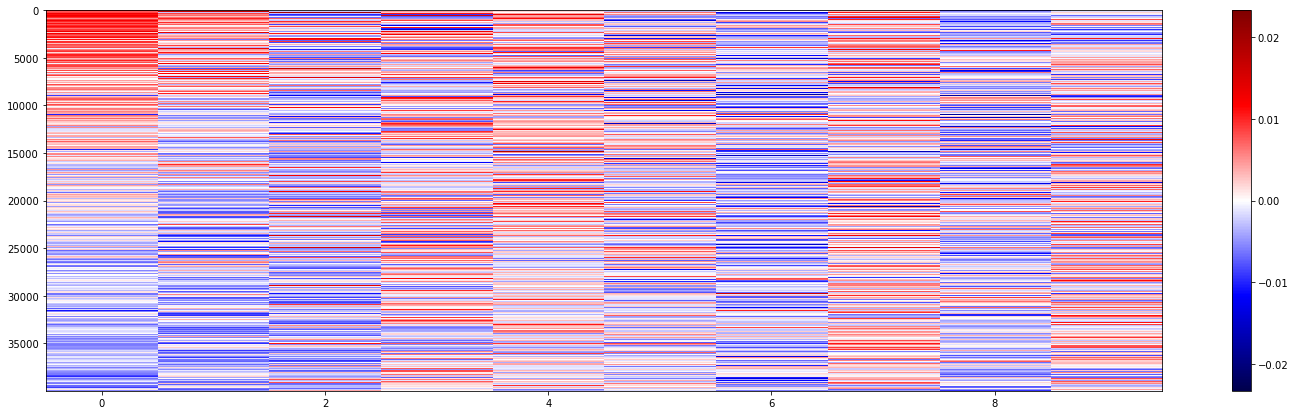

k = 0


,lowest words,lowest value,highest words,highest value
0,zahr,-0.013029,countries,0.018237
1,andya,-0.012857,government,0.017343
2,mahd,-0.012785,our,0.017275
3,chah,-0.012675,economic,0.017154
4,sahd,-0.012535,their,0.016919
5,sheh,-0.012510,any,0.016840
6,yahd,-0.012468,more,0.016606
7,fah,-0.012441,we,0.016332
8,puh,-0.012222,have,0.016278
9,jih,-0.012195,its,0.016272


k = 1


,lowest words,lowest value,highest words,highest value
0,non-families,-0.016825,john,0.018067
1,http://www.nasdaq.com,-0.013785,j.,0.017811
2,soluble,-0.013676,james,0.017568
3,stimuli,-0.013579,jr.,0.017444
4,neutrons,-0.013418,thomas,0.017294
5,receptors,-0.013351,william,0.017272
6,mixtures,-0.013214,david,0.017010
7,membranes,-0.013139,robert,0.016955
8,impedance,-0.013083,paul,0.016862
9,wavelengths,-0.013075,chairman,0.016676


k = 2


,lowest words,lowest value,highest words,highest value
0,feelings,-0.013782,cents,0.023289
1,sincerity,-0.013561,billion,0.021842
2,arrogant,-0.013539,km,0.021252
3,cynical,-0.013328,0.8,0.020579
4,sincere,-0.013075,0.4,0.020390
5,cowardly,-0.012937,%,0.019993
6,provocative,-0.012924,0.9,0.019755
7,demeanor,-0.012782,0.5,0.019695
8,hypocritical,-0.012741,0.7,0.019556
9,selfish,-0.012727,1.9,0.019434


k = 3


,lowest words,lowest value,highest words,highest value
0,guitar,-0.018128,minister,0.016938
1,beautiful,-0.016338,hamid,0.016465
2,album,-0.016230,mahmoud,0.016258
3,features,-0.015976,pna,0.016059
4,musical,-0.015948,moslem,0.015898
5,dark,-0.015490,ministers,0.015886
6,piano,-0.015373,u.s.-led,0.015801
7,comedy,-0.015215,hardline,0.015753
8,hair,-0.015185,abbas,0.015686
9,lovely,-0.015152,opposition,0.015597


k = 4


,lowest words,lowest value,highest words,highest value
0,sciences,-0.015858,seconds,0.023089
1,theological,-0.015652,1-0,0.023022
2,non-profit,-0.015193,inning,0.023021
3,202-887-8338,-0.014740,2-0,0.022959
4,architectural,-0.014297,1-1,0.022348
5,interdisciplinary,-0.014213,2-1,0.022305
6,linguistics,-0.013964,3-0,0.022127
7,not-for-profit,-0.013850,3-1,0.022074
8,humanities,-0.013845,2-2,0.021752
9,sociology,-0.013596,minutes,0.021257


k = 5


,lowest words,lowest value,highest words,highest value
0,outskirts,-0.021366,earnings,0.018861
1,villages,-0.020478,profit,0.016256
2,mosque,-0.019804,consumer,0.016239
3,kilometers,-0.019551,dividend,0.015943
4,gunmen,-0.019217,pretax,0.015861
5,northern,-0.019040,equity,0.015500
6,kilometres,-0.018835,securities,0.015386
7,stronghold,-0.018743,cents,0.015296
8,nearby,-0.018705,index,0.015234
9,village,-0.018640,yen,0.015223


k = 6


,lowest words,lowest value,highest words,highest value
0,first-class,-0.020013,mehd,0.016080
1,ecclesiastical,-0.019191,brah,0.015809
2,title,-0.019131,shoh,0.015710
3,nobility,-0.018794,tih,0.015610
4,honours,-0.018434,fuh,0.014728
5,ordained,-0.018392,shahm,0.014644
6,titles,-0.018392,debris,0.014297
7,christianity,-0.018289,kuh,0.014049
8,liturgical,-0.018249,truck,0.013975
9,peerage,-0.018191,hahk,0.013855


k = 7


,lowest words,lowest value,highest words,highest value
0,1-0,-0.023072,$,0.019554
1,2-0,-0.022725,married,0.018926
2,3-0,-0.022128,children,0.018668
3,3-1,-0.021583,wife,0.018508
4,3-2,-0.021535,husband,0.018462
5,2-1,-0.021359,pesos,0.018406
6,quarterfinal,-0.020850,million,0.017529
7,play-off,-0.020600,relatives,0.016937
8,4-2,-0.020459,households,0.016918
9,4-3,-0.020213,daughters,0.016828


k = 8


,lowest words,lowest value,highest words,highest value
0,ee,-0.022653,turmoil,0.014438
1,moh,-0.022443,surging,0.014015
2,leed,-0.020045,lingering,0.013863
3,adapter,-0.018841,sentiment,0.013734
4,doh,-0.018827,gripped,0.013438
5,protein,-0.018802,bleak,0.013300
6,beta,-0.018662,prosperous,0.013170
7,ah,-0.018405,resurgent,0.013112
8,uh,-0.018276,recession,0.013089
9,moo,-0.018251,unsettled,0.012815


k = 9


,lowest words,lowest value,highest words,highest value
0,tael,-0.022025,county,0.017777
1,dehl,-0.019387,probation,0.017463
2,sahd,-0.019195,felony,0.017166
3,asian,-0.018289,patients,0.017024
4,bihn,-0.018260,probate,0.016780
5,www.star,-0.017636,abortions,0.016620
6,malaysian,-0.017471,baronet,0.016535
7,ahb,-0.017181,antibiotics,0.016439
8,kaht,-0.017108,psychiatric,0.016393
9,thai,-0.017098,waivers,0.016344


In [14]:
U_svd,W_svd = view_results("../output/40000_by_300/40000_by_300_svd_U.csv",wordsfile,n=10,k=10)

In [15]:
np.mean(U_svd < 0.001)

0.6066475

(40000, 2)
(40000,)


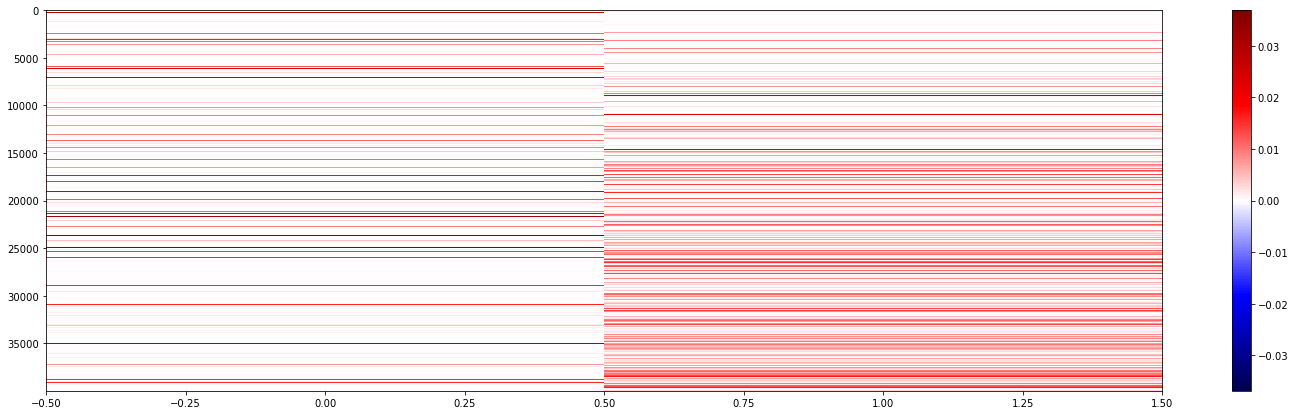

k = 0


,lowest words,lowest value,highest words,highest value
0,shuh,0.000006,0.4,0.036854
1,sgt.,0.000006,0.7,0.036724
2,dr.,0.000006,0.8,0.036703
3,detective,0.000007,0.9,0.036272
4,longtime,0.000007,0.2,0.035998
5,columnist,0.000007,0.07,0.035371
6,coordinator,0.000007,0.6,0.035313
7,commander,0.000008,0.1,0.035310
8,lawyer,0.000008,0.3,0.035233
9,prosecutor,0.000008,0.12,0.035181


k = 1


,lowest words,lowest value,highest words,highest value
0,businesses,0.000016,ahn,0.027484
1,areas,0.000016,nah,0.026194
2,companies,0.000016,sah,0.024903
3,existing,0.000017,hy,0.023930
4,materials,0.000017,mee,0.023804
5,larger,0.000017,ree,0.023658
6,largest,0.000017,yah,0.023528
7,systems,0.000017,nee,0.023411
8,economic,0.000017,noh,0.023382
9,facilities,0.000017,bah,0.023158


In [16]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=40000,prior="point_exponential_normal")
Lpe,Wpe = view_results(matrixfile,wordsfile,n=100)

# 400,000 words, 300 dimensions

very slow on local, and not convinced it would be any better???

# 15,000 words, 300 dimensions

(15000, 10)
(15000,)


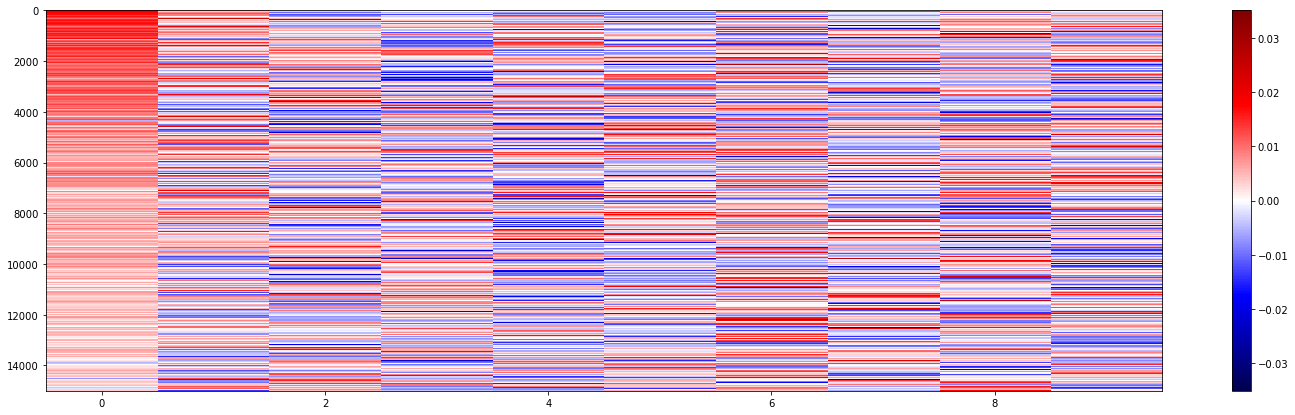

k = 0


,lowest words,lowest value,highest words,highest value
0,20003,-0.013041,government,0.022137
1,fah,-0.011854,we,0.021969
2,sah,-0.010395,countries,0.021853
3,luh,-0.009814,their,0.021812
4,s.e.,-0.009609,have,0.021659
5,kah,-0.009364,any,0.021634
6,kuh,-0.009183,our,0.021495
7,ih,-0.008334,not,0.021380
8,lah,-0.008189,more,0.021286
9,ree,-0.008150,they,0.021273


k = 1


,lowest words,lowest value,highest words,highest value
0,mechanisms,-0.020706,coach,0.026521
1,processes,-0.017844,scored,0.025525
2,dependence,-0.017809,champion,0.025413
3,concentrations,-0.017707,born,0.025284
4,variables,-0.017310,john,0.025272
5,sectors,-0.017288,williams,0.024645
6,emission,-0.017189,james,0.024391
7,emissions,-0.017142,jr.,0.024287
8,decreasing,-0.016938,thomas,0.024253
9,inflationary,-0.016885,son,0.024240


k = 2


,lowest words,lowest value,highest words,highest value
0,envoy,-0.027218,diameter,0.022854
1,minister,-0.027101,temperature,0.021431
2,separatist,-0.025913,density,0.021406
3,hardline,-0.025268,calories,0.020840
4,mahmoud,-0.025161,liquid,0.020818
5,abbas,-0.024953,sizes,0.020469
6,yasser,-0.024900,features,0.020468
7,hamid,-0.024876,cream,0.020297
8,pervez,-0.024792,vertical,0.020082
9,condemned,-0.024584,width,0.019888


k = 3


,lowest words,lowest value,highest words,highest value
0,kilometers,-0.032181,humor,0.024513
1,km,-0.032117,funny,0.022805
2,kilometres,-0.030118,subtle,0.022738
3,tonnes,-0.027210,lyrics,0.022526
4,tons,-0.025467,feelings,0.022506
5,hectares,-0.025466,humorous,0.022449
6,billion,-0.025282,character,0.022305
7,1.6,-0.024818,emotions,0.022269
8,1.9,-0.024535,sexuality,0.021975
9,northeast,-0.024407,personality,0.021742


k = 4


,lowest words,lowest value,highest words,highest value
0,grenades,-0.027890,sciences,0.027794
1,hurled,-0.026321,institute,0.026494
2,gunfire,-0.026294,phd,0.025683
3,grenade,-0.026248,educational,0.025673
4,attackers,-0.025125,humanities,0.025634
5,blew,-0.025078,corporation,0.025389
6,militants,-0.024947,research,0.025301
7,shells,-0.024866,education,0.025004
8,pounded,-0.024829,non-profit,0.024371
9,flames,-0.024699,economics,0.023903


k = 5


,lowest words,lowest value,highest words,highest value
0,deficit,-0.029490,ancient,0.029553
1,earnings,-0.029024,medieval,0.029037
2,yen,-0.027585,village,0.024997
3,rebounds,-0.025555,located,0.024920
4,rebound,-0.024930,cemetery,0.024746
5,slump,-0.024658,monastery,0.024480
6,disappointing,-0.024441,temples,0.024364
7,rebounded,-0.024258,inhabited,0.024337
8,inflation,-0.023785,sacred,0.023957
9,euro,-0.023751,buddhist,0.023595


k = 6


,lowest words,lowest value,highest words,highest value
0,fbi,-0.028648,1-0,0.035054
1,investigators,-0.028319,3-1,0.034856
2,testified,-0.026773,3-0,0.034798
3,attorney,-0.026460,2-0,0.034383
4,pleaded,-0.025842,finals,0.034245
5,allegedly,-0.025672,champions,0.033853
6,convicted,-0.025503,quarterfinal,0.033742
7,spokeswoman,-0.024702,2-1,0.033654
8,undercover,-0.024608,semifinal,0.033574
9,explosives,-0.024490,semifinals,0.033328


k = 7


,lowest words,lowest value,highest words,highest value
0,reconnaissance,-0.034181,pesos,0.031784
1,tactical,-0.032787,0.4,0.031651
2,radar,-0.032053,0.2,0.031226
3,activated,-0.031668,0.3,0.030955
4,sensors,-0.031126,households,0.030643
5,missile,-0.030844,percent,0.030324
6,shuttle,-0.030495,capita,0.030032
7,inspection,-0.030459,incomes,0.029987
8,configuration,-0.030236,0.7,0.029885
9,faa,-0.030204,0.6,0.029646


k = 8


,lowest words,lowest value,highest words,highest value
0,multimedia,-0.029520,disease,0.034722
1,tv,-0.027035,infections,0.033904
2,video,-0.026310,infection,0.032817
3,posters,-0.026026,incidence,0.032529
4,greeting,-0.025626,diagnosed,0.030688
5,themed,-0.025333,illnesses,0.030546
6,entertainment,-0.025277,diseases,0.030536
7,showcase,-0.025218,illness,0.030140
8,sony,-0.025038,tuberculosis,0.029647
9,interactive,-0.024865,severe,0.029583


k = 9


,lowest words,lowest value,highest words,highest value
0,eligible,-0.032476,economy,0.032627
1,applicants,-0.029593,strategist,0.031238
2,minors,-0.029434,economist,0.031078
3,milligrams,-0.028574,economic,0.030607
4,tickets,-0.028352,oil,0.029968
5,entries,-0.027752,river,0.028938
6,probation,-0.027625,slowdown,0.028645
7,valid,-0.027290,flows,0.028155
8,referees,-0.027011,analyst,0.028102
9,copies,-0.026838,energy,0.027579


In [17]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=15000,prior="point_normal")
Lpn,Wpn = view_results(matrixfile,wordsfile,n=10)

(15000, 10)
(15000,)


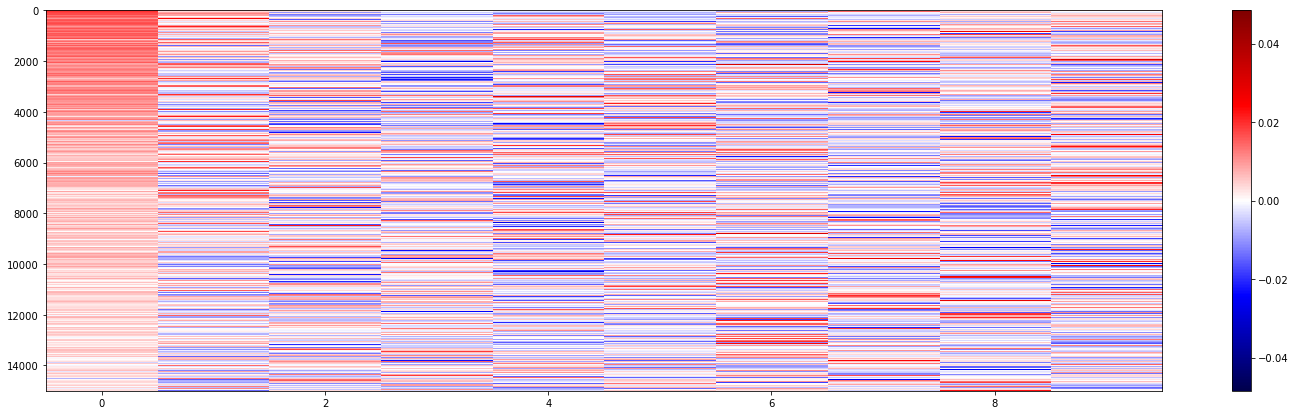

k = 0


,lowest words,lowest value,highest words,highest value
0,20003,-0.013141,government,0.022801
1,fah,-0.011931,we,0.022608
2,sah,-0.010408,countries,0.022477
3,luh,-0.009752,their,0.022410
4,s.e.,-0.009589,any,0.022264
5,kah,-0.009299,have,0.022245
6,kuh,-0.009110,our,0.022092
7,ih,-0.008232,not,0.021991
8,lah,-0.008054,more,0.021859
9,ree,-0.008001,they,0.021857


k = 1


,lowest words,lowest value,highest words,highest value
0,mechanisms,-0.021666,coach,0.028569
1,concentrations,-0.018495,scored,0.027467
2,processes,-0.018445,champion,0.027255
3,dependence,-0.018442,john,0.027255
4,variables,-0.017984,born,0.027145
5,emission,-0.017878,williams,0.026520
6,sectors,-0.017837,james,0.026268
7,emissions,-0.017682,jr.,0.026154
8,decreasing,-0.017525,thomas,0.026124
9,nitrogen,-0.017345,son,0.025826


k = 2


,lowest words,lowest value,highest words,highest value
0,envoy,-0.029422,diameter,0.024143
1,minister,-0.029232,temperature,0.022702
2,separatist,-0.028269,density,0.022541
3,mahmoud,-0.027457,liquid,0.022149
4,hardline,-0.027431,features,0.021994
5,abbas,-0.027182,calories,0.021990
6,yasser,-0.027072,sizes,0.021642
7,hamid,-0.027003,cream,0.021639
8,pervez,-0.026939,vertical,0.021216
9,musharraf,-0.026506,color,0.021004


k = 3


,lowest words,lowest value,highest words,highest value
0,km,-0.035408,humor,0.026290
1,kilometers,-0.034944,feelings,0.024432
2,kilometres,-0.032540,subtle,0.024342
3,tonnes,-0.030419,funny,0.024338
4,billion,-0.029458,emotions,0.024172
5,1.6,-0.028501,humorous,0.024049
6,tons,-0.028458,lyrics,0.024003
7,1.9,-0.028250,character,0.023678
8,cents,-0.028186,sexuality,0.023398
9,hectares,-0.028017,emotion,0.023266


k = 4


,lowest words,lowest value,highest words,highest value
0,grenades,-0.030655,sciences,0.031630
1,hurled,-0.028904,institute,0.029677
2,grenade,-0.028776,educational,0.029001
3,gunfire,-0.028616,phd,0.028987
4,blew,-0.028072,humanities,0.028915
5,pounded,-0.027759,research,0.027952
6,flames,-0.027333,education,0.027867
7,attackers,-0.027295,non-profit,0.027528
8,screaming,-0.027086,corporation,0.027343
9,ripped,-0.027054,science,0.026966


k = 5


,lowest words,lowest value,highest words,highest value
0,earnings,-0.032720,ancient,0.032696
1,deficit,-0.032311,medieval,0.031676
2,yen,-0.030520,village,0.028494
3,rebounds,-0.026663,cemetery,0.028109
4,rebound,-0.026520,located,0.028022
5,disappointing,-0.026299,inhabited,0.027452
6,slump,-0.026268,monastery,0.027295
7,investors,-0.026249,temples,0.027132
8,inflation,-0.025952,villages,0.026052
9,euro,-0.025670,sacred,0.025956


k = 6


,lowest words,lowest value,highest words,highest value
0,fbi,-0.032893,1-0,0.043012
1,investigators,-0.031974,3-0,0.042769
2,attorney,-0.030720,3-1,0.042611
3,testified,-0.030604,2-0,0.042073
4,pleaded,-0.029152,finals,0.041361
5,convicted,-0.028743,2-1,0.041048
6,allegedly,-0.028420,champions,0.041027
7,spokeswoman,-0.027532,quarterfinal,0.040960
8,undercover,-0.027255,semifinal,0.040758
9,arrested,-0.027150,semifinals,0.040508


k = 7


,lowest words,lowest value,highest words,highest value
0,reconnaissance,-0.039508,0.4,0.035767
1,radar,-0.036894,households,0.035583
2,tactical,-0.036796,0.2,0.035255
3,missile,-0.036174,0.3,0.034772
4,shuttle,-0.035315,catholics,0.034755
5,unmanned,-0.034986,pesos,0.034702
6,sensors,-0.034906,capita,0.034450
7,activated,-0.034509,incomes,0.034016
8,inspection,-0.034035,percent,0.033858
9,squadron,-0.033852,0.7,0.033784


k = 8


,lowest words,lowest value,highest words,highest value
0,multimedia,-0.034043,disease,0.048470
1,posters,-0.032438,infections,0.046841
2,banners,-0.031251,infection,0.046492
3,tv,-0.031151,incidence,0.042701
4,entertainment,-0.030799,diseases,0.042180
5,themed,-0.030685,diagnosed,0.041587
6,showcase,-0.030143,illness,0.040284
7,greeting,-0.030114,tuberculosis,0.039937
8,video,-0.029324,illnesses,0.039016
9,interactive,-0.029035,severe,0.038809


k = 9


,lowest words,lowest value,highest words,highest value
0,eligible,-0.038906,economy,0.040312
1,applicants,-0.035221,economist,0.037579
2,minors,-0.035181,strategist,0.037449
3,milligrams,-0.034490,economic,0.037400
4,probation,-0.034127,oil,0.035545
5,felony,-0.033025,slowdown,0.035394
6,valid,-0.032721,downturn,0.033661
7,exam,-0.031789,analyst,0.033349
8,tickets,-0.031521,recession,0.033249
9,exams,-0.031266,markets,0.032417


In [18]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=15000,prior="point_laplace")
Lpl,Wpl = view_results(matrixfile,wordsfile ,n=10)

(15000, 10)
(15000,)


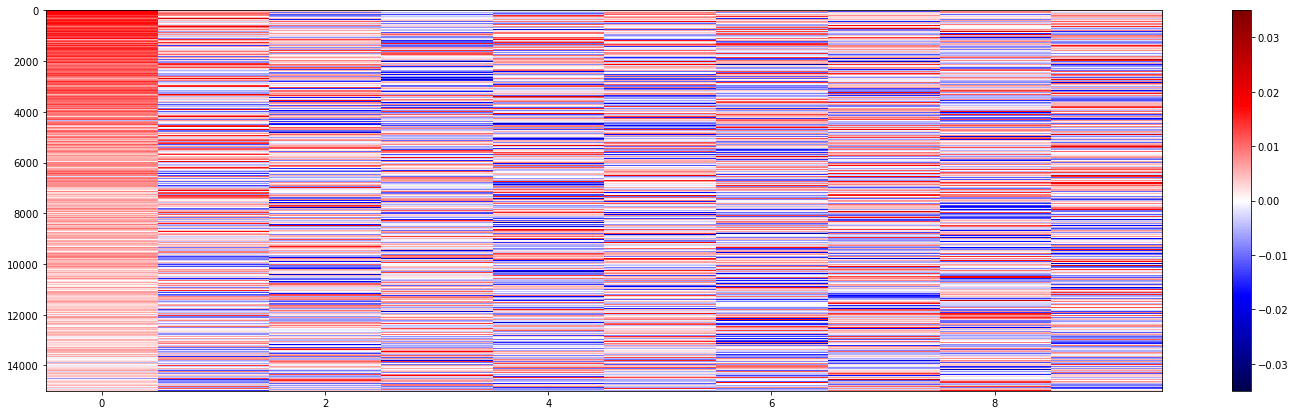

k = 0


,lowest words,lowest value,highest words,highest value
0,20003,-0.012961,government,0.022131
1,fah,-0.011846,we,0.021987
2,sah,-0.010409,countries,0.021829
3,luh,-0.009762,their,0.021804
4,s.e.,-0.009592,have,0.021652
5,kah,-0.009335,any,0.021648
6,kuh,-0.009151,our,0.021473
7,ih,-0.008341,not,0.021404
8,lah,-0.008153,they,0.021296
9,ree,-0.008105,more,0.021291


k = 1


,lowest words,lowest value,highest words,highest value
0,mechanisms,-0.020717,coach,0.026524
1,processes,-0.017878,scored,0.025517
2,dependence,-0.017817,champion,0.025396
3,concentrations,-0.017712,born,0.025285
4,variables,-0.017341,john,0.025264
5,sectors,-0.017291,williams,0.024627
6,emission,-0.017204,james,0.024389
7,emissions,-0.017152,jr.,0.024279
8,decreasing,-0.016937,son,0.024249
9,inflationary,-0.016889,thomas,0.024241


k = 2


,lowest words,lowest value,highest words,highest value
0,envoy,-0.027224,diameter,0.022826
1,minister,-0.027091,temperature,0.021380
2,separatist,-0.025891,density,0.021359
3,hardline,-0.025309,liquid,0.020815
4,mahmoud,-0.025179,calories,0.020780
5,abbas,-0.024962,features,0.020458
6,yasser,-0.024925,sizes,0.020445
7,hamid,-0.024895,cream,0.020287
8,pervez,-0.024808,vertical,0.020040
9,condemned,-0.024609,width,0.019864


k = 3


,lowest words,lowest value,highest words,highest value
0,kilometers,-0.032160,humor,0.024526
1,km,-0.032103,funny,0.022833
2,kilometres,-0.030101,subtle,0.022748
3,tonnes,-0.027189,lyrics,0.022530
4,hectares,-0.025456,feelings,0.022507
5,tons,-0.025441,humorous,0.022453
6,billion,-0.025272,character,0.022307
7,1.6,-0.024801,emotions,0.022282
8,1.9,-0.024519,sexuality,0.021965
9,northeast,-0.024403,personality,0.021742


k = 4


,lowest words,lowest value,highest words,highest value
0,grenades,-0.028320,sciences,0.027349
1,gunfire,-0.026712,institute,0.026118
2,grenade,-0.026609,phd,0.025341
3,hurled,-0.026542,educational,0.025286
4,attackers,-0.025415,humanities,0.025282
5,militants,-0.025385,corporation,0.025282
6,shells,-0.025268,research,0.025158
7,blew,-0.025075,education,0.024799
8,flames,-0.024854,economics,0.023890
9,pounded,-0.024768,non-profit,0.023849


k = 5


,lowest words,lowest value,highest words,highest value
0,ancient,-0.029398,deficit,0.029339
1,medieval,-0.029038,earnings,0.028581
2,located,-0.025056,yen,0.027400
3,village,-0.024784,rebounds,0.025850
4,cemetery,-0.024636,rebound,0.025131
5,monastery,-0.024409,slump,0.024827
6,temples,-0.024154,disappointing,0.024469
7,inhabited,-0.023985,rebounded,0.024464
8,sacred,-0.023852,inflation,0.023679
9,buddhist,-0.023595,euro,0.023622


k = 6


,lowest words,lowest value,highest words,highest value
0,1-0,-0.034963,fbi,0.028598
1,3-1,-0.034769,investigators,0.028286
2,3-0,-0.034710,testified,0.026725
3,2-0,-0.034294,attorney,0.026400
4,finals,-0.034160,pleaded,0.025799
5,champions,-0.033763,allegedly,0.025659
6,quarterfinal,-0.033666,convicted,0.025480
7,2-1,-0.033566,spokeswoman,0.024647
8,semifinal,-0.033496,undercover,0.024568
9,semifinals,-0.033253,explosives,0.024478


k = 7


,lowest words,lowest value,highest words,highest value
0,pesos,-0.031032,activated,0.031282
1,0.4,-0.028521,reconnaissance,0.030934
2,0.3,-0.028072,tactical,0.029938
3,0.2,-0.028068,squadron,0.028961
4,0.7,-0.027029,faa,0.028879
5,percent,-0.026776,detection,0.028080
6,0.8,-0.026684,radar,0.027753
7,0.6,-0.026571,sensors,0.027549
8,0.1,-0.026374,configuration,0.027412
9,yen,-0.026116,torpedo,0.027393


k = 8


,lowest words,lowest value,highest words,highest value
0,multimedia,-0.029309,disease,0.034657
1,video,-0.026866,infections,0.033820
2,logo,-0.025768,incidence,0.033012
3,interactive,-0.025750,population,0.032389
4,tv,-0.025341,mortality,0.031171
5,audio,-0.025307,infection,0.031046
6,talks,-0.024918,diagnosed,0.030857
7,satellite,-0.024498,illnesses,0.030777
8,unveil,-0.024017,tuberculosis,0.030062
9,showcase,-0.023816,illness,0.029983


k = 9


,lowest words,lowest value,highest words,highest value
0,eligible,-0.032443,economy,0.032063
1,applicants,-0.029538,economist,0.030865
2,minors,-0.029291,strategist,0.030702
3,tickets,-0.028879,economic,0.030357
4,probation,-0.027097,oil,0.029677
5,milligrams,-0.027093,river,0.028462
6,entries,-0.027006,slowdown,0.028412
7,referees,-0.026890,analyst,0.028102
8,valid,-0.026385,flows,0.027891
9,copies,-0.025909,energy,0.027608


In [19]:
U_svd,W_svd = view_results("../output/15000_by_300/15000_by_300_svd_U.csv",wordsfile,n=10,k=10)

In [20]:
(Lpe<0.001).mean()

0.698025

(15000, 10)
(15000,)


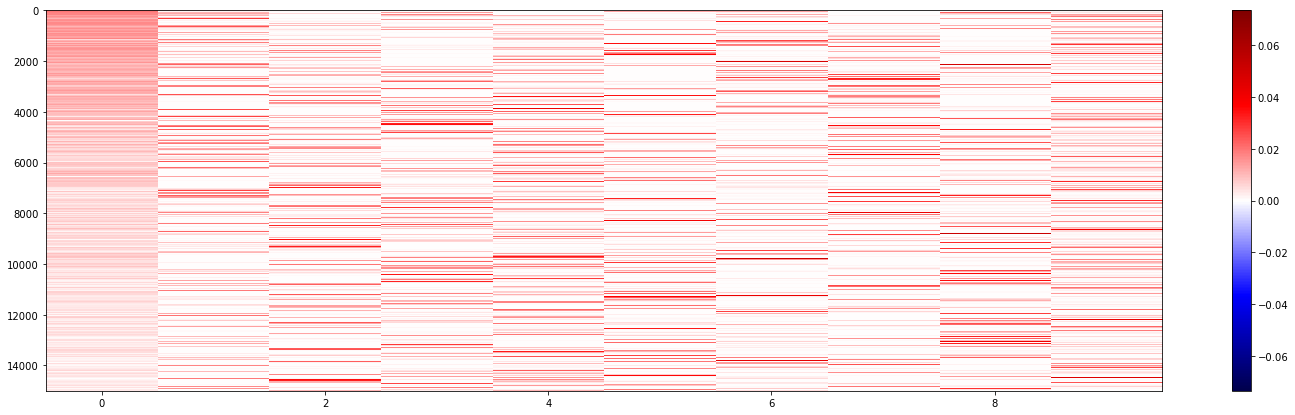

k = 0


,lowest words,lowest value,highest words,highest value
0,20003,0.000243,we,0.022701
1,fah,0.000272,government,0.022664
2,sah,0.000308,their,0.022429
3,s.e.,0.000318,have,0.022300
4,luh,0.000326,countries,0.022225
5,kah,0.000337,any,0.022210
6,kuh,0.000342,not,0.022094
7,non-families,0.000367,our,0.022029
8,ih,0.000376,they,0.021951
9,dah,0.000379,more,0.021842


k = 1


,lowest words,lowest value,highest words,highest value
0,mechanisms,0.000013,scored,0.035820
1,concentrations,0.000015,coach,0.034049
2,sectors,0.000016,john,0.033149
3,dependence,0.000016,champion,0.032994
4,worsening,0.000017,born,0.032932
5,variables,0.000017,williams,0.032725
6,processes,0.000017,jason,0.032479
7,liberalization,0.000018,james,0.032359
8,safeguard,0.000018,thomas,0.032228
9,minimize,0.000018,chris,0.031971


k = 2


,lowest words,lowest value,highest words,highest value
0,minister,0.000016,thick,0.044123
1,envoy,0.000018,diameter,0.042989
2,reaffirmed,0.000018,plastic,0.042664
3,elections,0.000018,liquid,0.041850
4,deputy,0.000018,layer,0.040858
5,affairs,0.000019,sauce,0.039802
6,reiterated,0.000019,skin,0.039798
7,resign,0.000019,layers,0.039649
8,secretary,0.000019,surfaces,0.039559
9,delegation,0.000019,texture,0.039463


k = 3


,lowest words,lowest value,highest words,highest value
0,retail,0.000019,militants,0.046918
1,advertising,0.000021,islamist,0.044824
2,marketing,0.000022,separatist,0.044269
3,interactive,0.000023,shiite,0.044138
4,fdch,0.000023,rebels,0.044109
5,earnings,0.000023,moslem,0.043425
6,average,0.000023,hamas,0.042681
7,sales,0.000024,militant,0.042180
8,credits,0.000024,sunni,0.041732
9,creative,0.000024,rebel,0.041419


k = 4


,lowest words,lowest value,highest words,highest value
0,kilometers,0.000025,cognitive,0.046382
1,crashed,0.000028,behavioral,0.042864
2,injuring,0.000028,mechanisms,0.042750
3,blew,0.000031,processes,0.042047
4,stranded,0.000031,fundamental,0.041666
5,killed,0.000031,theoretical,0.041268
6,wounded,0.000031,principles,0.041029
7,chased,0.000032,mathematical,0.040747
8,smashed,0.000032,rational,0.039908
9,sank,0.000033,variables,0.039824


k = 5


,lowest words,lowest value,highest words,highest value
0,tonnes,0.000015,funny,0.050401
1,transport,0.000015,laugh,0.049715
2,agricultural,0.000016,love,0.044773
3,petroleum,0.000016,loved,0.044422
4,km,0.000016,sorry,0.044120
5,forestry,0.000017,sad,0.044086
6,units,0.000017,feelings,0.043819
7,railway,0.000017,'m,0.043007
8,located,0.000018,loves,0.042920
9,hectares,0.000018,crying,0.042557


k = 6


,lowest words,lowest value,highest words,highest value
0,sacred,0.000034,0.4,0.057385
1,elaborate,0.000034,cents,0.056454
2,refer,0.000035,0.8,0.056057
3,martial,0.000035,0.7,0.055873
4,medieval,0.000035,billion,0.055320
5,acting,0.000037,0.2,0.054940
6,ancient,0.000037,0.9,0.054870
7,style,0.000038,0.3,0.054159
8,dr.,0.000038,2.9,0.054053
9,well-known,0.000040,0.6,0.053905


k = 7


,lowest words,lowest value,highest words,highest value
0,non-families,0.000020,located,0.049345
1,o'neal,0.000023,railway,0.046264
2,baseman,0.000024,situated,0.045474
3,defenseman,0.000024,1859,0.043859
4,teammate,0.000025,1867,0.043787
5,goalie,0.000025,1869,0.043641
6,referee,0.000025,1889,0.043611
7,fielder,0.000025,1857,0.043509
8,shortstop,0.000025,1855,0.043478
9,rookie,0.000026,1885,0.043321


k = 8


,lowest words,lowest value,highest words,highest value
0,t.,0.000013,3-0,0.073321
1,married,0.000014,1-0,0.073138
2,l.,0.000014,3-1,0.071943
3,e.,0.000015,2-0,0.071894
4,j.,0.000015,2-1,0.070078
5,edward,0.000016,3-2,0.069764
6,r.,0.000016,4-1,0.069465
7,p.,0.000016,4-0,0.068966
8,editor,0.000016,4-2,0.068278
9,rev.,0.000017,quarterfinal,0.066689


k = 9


,lowest words,lowest value,highest words,highest value
0,nationalism,0.000060,attorney,0.055968
1,mortality,0.000064,attorneys,0.052978
2,deadliest,0.000066,counsel,0.052196
3,achieved,0.000069,filed,0.050468
4,peaking,0.000069,enron,0.050034
5,sectarian,0.000070,lawsuit,0.049585
6,poverty,0.000071,prosecutors,0.047794
7,attained,0.000073,lawyers,0.046779
8,continent,0.000074,sued,0.046547
9,ethnic,0.000074,lobbyist,0.046492


In [21]:
matrixfile,wordsfile = get_filenames(dim=300,truncatenum=15000,prior="point_exponential_normal")
Lpe,Wpe = view_results(matrixfile,wordsfile,n=50)

The above seemed to be the most promising result so far. The topics are intersting and sort-of interpretable. However, some topics are fairly problematic.

0. Common words?
1. Names of men and sports coaches
2. Recipes/cooking
3. War/conflict in the middle east and also elsewhere, potentially problematic
4. Academic words
5. Emotions
6. Decimals, numbers, money
7. Years in the 1800s and early 1900s
8. Scores of sports games, championship games
9. Legal & buisness jargon, also includes "lewinsky" oddly enough

This seemed promising, so I then increased the maximum number of factors. Flash automatically stopped adding factors at K=55. Here are the results from that.

In [23]:
matrixfile

'../output/15000_by_300/15000_by_300_point_exponential_normal_backfit_FALSE_L.csv'

(15000, 55)
(15000,)


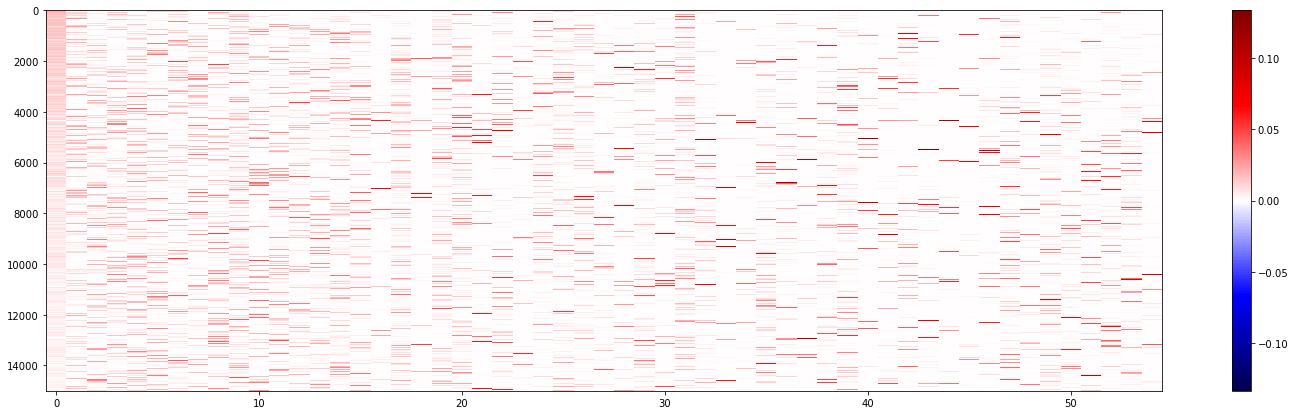

k = 0


,lowest words,lowest value,highest words,highest value
0,20003,0.000243,we,0.022701
1,fah,0.000272,government,0.022664
2,sah,0.000308,their,0.022429
3,s.e.,0.000318,have,0.022300
4,luh,0.000326,countries,0.022225
5,kah,0.000337,any,0.022210
6,kuh,0.000342,not,0.022094
7,non-families,0.000367,our,0.022029
8,ih,0.000376,they,0.021951
9,dah,0.000379,more,0.021842


k = 1


,lowest words,lowest value,highest words,highest value
0,mechanisms,0.000013,scored,0.035820
1,concentrations,0.000015,coach,0.034049
2,sectors,0.000016,john,0.033149
3,dependence,0.000016,champion,0.032994
4,worsening,0.000017,born,0.032932
5,variables,0.000017,williams,0.032725
6,processes,0.000017,jason,0.032479
7,liberalization,0.000018,james,0.032359
8,safeguard,0.000018,thomas,0.032228
9,minimize,0.000018,chris,0.031971


k = 2


,lowest words,lowest value,highest words,highest value
0,minister,0.000016,thick,0.044123
1,envoy,0.000018,diameter,0.042989
2,reaffirmed,0.000018,plastic,0.042664
3,elections,0.000018,liquid,0.041850
4,deputy,0.000018,layer,0.040858
5,affairs,0.000019,sauce,0.039802
6,reiterated,0.000019,skin,0.039798
7,resign,0.000019,layers,0.039649
8,secretary,0.000019,surfaces,0.039559
9,delegation,0.000019,texture,0.039463


k = 3


,lowest words,lowest value,highest words,highest value
0,retail,0.000019,militants,0.046918
1,advertising,0.000021,islamist,0.044824
2,marketing,0.000022,separatist,0.044269
3,interactive,0.000023,shiite,0.044138
4,fdch,0.000023,rebels,0.044109
5,earnings,0.000023,moslem,0.043425
6,average,0.000023,hamas,0.042681
7,sales,0.000024,militant,0.042180
8,credits,0.000024,sunni,0.041732
9,creative,0.000024,rebel,0.041419


k = 4


,lowest words,lowest value,highest words,highest value
0,kilometers,0.000025,cognitive,0.046382
1,crashed,0.000028,behavioral,0.042864
2,injuring,0.000028,mechanisms,0.042750
3,blew,0.000031,processes,0.042047
4,stranded,0.000031,fundamental,0.041666
5,killed,0.000031,theoretical,0.041268
6,wounded,0.000031,principles,0.041029
7,chased,0.000032,mathematical,0.040747
8,smashed,0.000032,rational,0.039908
9,sank,0.000033,variables,0.039824


k = 5


,lowest words,lowest value,highest words,highest value
0,tonnes,0.000015,funny,0.050401
1,transport,0.000015,laugh,0.049715
2,agricultural,0.000016,love,0.044773
3,petroleum,0.000016,loved,0.044422
4,km,0.000016,sorry,0.044120
5,forestry,0.000017,sad,0.044086
6,units,0.000017,feelings,0.043819
7,railway,0.000017,'m,0.043007
8,located,0.000018,loves,0.042920
9,hectares,0.000018,crying,0.042557


k = 6


,lowest words,lowest value,highest words,highest value
0,sacred,0.000034,0.4,0.057385
1,elaborate,0.000034,cents,0.056454
2,refer,0.000035,0.8,0.056057
3,martial,0.000035,0.7,0.055873
4,medieval,0.000035,billion,0.055320
5,acting,0.000037,0.2,0.054940
6,ancient,0.000037,0.9,0.054870
7,style,0.000038,0.3,0.054159
8,dr.,0.000038,2.9,0.054053
9,well-known,0.000040,0.6,0.053905


k = 7


,lowest words,lowest value,highest words,highest value
0,non-families,0.000020,located,0.049345
1,o'neal,0.000023,railway,0.046264
2,baseman,0.000024,situated,0.045474
3,defenseman,0.000024,1859,0.043859
4,teammate,0.000025,1867,0.043787
5,goalie,0.000025,1869,0.043641
6,referee,0.000025,1889,0.043611
7,fielder,0.000025,1857,0.043509
8,shortstop,0.000025,1855,0.043478
9,rookie,0.000026,1885,0.043321


k = 8


,lowest words,lowest value,highest words,highest value
0,t.,0.000013,3-0,0.073321
1,married,0.000014,1-0,0.073138
2,l.,0.000014,3-1,0.071943
3,e.,0.000015,2-0,0.071894
4,j.,0.000015,2-1,0.070078
5,edward,0.000016,3-2,0.069764
6,r.,0.000016,4-1,0.069465
7,p.,0.000016,4-0,0.068966
8,editor,0.000016,4-2,0.068278
9,rev.,0.000017,quarterfinal,0.066689


k = 9


,lowest words,lowest value,highest words,highest value
0,nationalism,0.000060,attorney,0.055968
1,mortality,0.000064,attorneys,0.052978
2,deadliest,0.000066,counsel,0.052196
3,achieved,0.000069,filed,0.050468
4,peaking,0.000069,enron,0.050034
5,sectarian,0.000070,lawsuit,0.049585
6,poverty,0.000071,prosecutors,0.047794
7,attained,0.000073,lawyers,0.046779
8,continent,0.000074,sued,0.046547
9,ethnic,0.000074,lobbyist,0.046492


k = 10


,lowest words,lowest value,highest words,highest value
0,format,0.000014,infections,0.077821
1,coveted,0.000019,disease,0.075890
2,formats,0.000020,infection,0.073175
3,polished,0.000021,diseases,0.071413
4,delegation,0.000021,cholera,0.071038
5,colorful,0.000022,pneumonia,0.070610
6,printed,0.000022,respiratory,0.070250
7,constitution,0.000022,outbreaks,0.065511
8,hats,0.000023,severe,0.065234
9,seating,0.000024,illnesses,0.065224


k = 11


,lowest words,lowest value,highest words,highest value
0,explosives,0.000018,democrats,0.066990
1,arrested,0.000019,centrist,0.063140
2,policemen,0.000020,democrat,0.062231
3,confiscated,0.000020,democratic,0.060106
4,police,0.000020,republican,0.059844
5,detained,0.000021,conservatives,0.059826
6,abducted,0.000022,merkel,0.059211
7,civilians,0.000022,gop,0.058710
8,suspected,0.000022,reelection,0.057806
9,wounding,0.000023,conservative,0.057185


k = 12


,lowest words,lowest value,highest words,highest value
0,diocese,0.000020,aircraft,0.075397
1,garlic,0.000023,reconnaissance,0.072303
2,fruits,0.000023,helicopter,0.070804
3,herbs,0.000026,helicopters,0.070612
4,divorce,0.000027,unmanned,0.069298
5,cheese,0.000027,patrol,0.067394
6,tomatoes,0.000028,armored,0.065434
7,dried,0.000029,squadron,0.063339
8,richest,0.000030,planes,0.063184
9,onion,0.000030,armoured,0.062325


k = 13


,lowest words,lowest value,highest words,highest value
0,suez,0.000028,students,0.055737
1,canal,0.000030,athletes,0.050791
2,strategic,0.000030,hispanic,0.048940
3,refinery,0.000031,women,0.048364
4,shipbuilding,0.000033,adults,0.047820
5,slowdown,0.000033,scholarships,0.047684
6,oil,0.000033,teachers,0.047678
7,profitability,0.000034,males,0.047412
8,energy,0.000034,aged,0.047119
9,railway,0.000035,professors,0.046950


k = 14


,lowest words,lowest value,highest words,highest value
0,slept,0.000032,dvd,0.062446
1,yards,0.000033,anime,0.061231
2,whites,0.000034,video,0.059882
3,walked,0.000036,itunes,0.059589
4,taxpayers,0.000036,audio,0.057265
5,parishes,0.000036,sony,0.055909
6,confederate,0.000038,entertainment,0.055667
7,lying,0.000039,cd,0.055421
8,republicans,0.000040,edition,0.055210
9,justices,0.000040,manga,0.054985


k = 15


,lowest words,lowest value,highest words,highest value
0,center,0.000022,statute,0.065418
1,diverse,0.000023,imprisonment,0.063617
2,outreach,0.000023,unconstitutional,0.060214
3,consultant,0.000025,sentence,0.057651
4,downtown,0.000025,offence,0.057635
5,strategist,0.000026,abolished,0.056496
6,neighborhood,0.000027,felony,0.055985
7,upscale,0.000028,clause,0.055772
8,northeast,0.000028,amended,0.055392
9,southeast,0.000028,parole,0.055379


k = 16


,lowest words,lowest value,highest words,highest value
0,hampshire,0.000007,yu,0.084798
1,republican,0.000007,lin,0.082075
2,bosnian,0.000008,yang,0.082039
3,pullback,0.000008,yong,0.081657
4,tutsis,0.000008,jin,0.081233
5,republicans,0.000009,li,0.080930
6,bombings,0.000009,zhang,0.079902
7,jewish,0.000009,wang,0.079358
8,jacksonville,0.000009,chen,0.079349
9,palestinians,0.000009,yi,0.079157


k = 17


,lowest words,lowest value,highest words,highest value
0,transcript,0.000042,plantations,0.056695
1,autopsy,0.000046,caspian,0.053426
2,errors,0.000047,prosperous,0.053215
3,exam,0.000050,farming,0.052899
4,topix,0.000052,forests,0.052641
5,error,0.000053,habitats,0.051357
6,digits,0.000055,rich,0.051314
7,metre,0.000057,agricultural,0.050987
8,diagnosis,0.000059,sustainable,0.050934
9,readings,0.000061,oil,0.050927


k = 18


,lowest words,lowest value,highest words,highest value
0,sussex,0.000002,luis,0.097050
1,surrey,0.000002,josé,0.091221
2,somerset,0.000003,juan,0.086668
3,brett,0.000003,jorge,0.084548
4,raiders,0.000003,de,0.083455
5,hampshire,0.000003,jose,0.081708
6,sunni,0.000003,nacional,0.079439
7,lancashire,0.000003,carlos,0.079044
8,afc,0.000003,alberto,0.078466
9,bucks,0.000003,enrique,0.078208


k = 19


,lowest words,lowest value,highest words,highest value
0,expo,0.000059,ancestor,0.071086
1,clinics,0.000060,byzantine,0.070287
2,schedules,0.000062,ancient,0.065791
3,departments,0.000063,medieval,0.064501
4,venues,0.000063,manuscript,0.062763
5,congestion,0.000064,tomb,0.062634
6,kaohsiung,0.000064,inscription,0.062608
7,regulations,0.000070,prophet,0.061446
8,20003,0.000071,biblical,0.060515
9,manitoba,0.000071,philosopher,0.060445


k = 20


,lowest words,lowest value,highest words,highest value
0,battalions,0.000025,downtown,0.075228
1,genus,0.000030,plaza,0.064577
2,regiments,0.000032,crowded,0.059714
3,species,0.000033,parking,0.058115
4,squadrons,0.000038,hotel,0.057836
5,regiment,0.000039,mall,0.057066
6,battalion,0.000039,sidewalk,0.056231
7,extinct,0.000040,auditorium,0.055692
8,infantry,0.000041,a.m.,0.055583
9,squadron,0.000041,p.m.,0.055203


k = 21


,lowest words,lowest value,highest words,highest value
0,qualifier,0.000005,astros,0.090149
1,compatriot,0.000006,mets,0.088809
2,austria,0.000007,diamondbacks,0.088586
3,quarterfinals,0.000007,phillies,0.088031
4,match,0.000007,orioles,0.087463
5,mauresmo,0.000007,braves,0.086603
6,belgium,0.000007,yankees,0.085903
7,germany,0.000007,seahawks,0.085729
8,france,0.000007,dodgers,0.084125
9,cup,0.000008,jays,0.083990


k = 22


,lowest words,lowest value,highest words,highest value
0,annan,0.000017,extortion,0.089876
1,pray,0.000018,robbery,0.082566
2,evacuate,0.000018,conspiracy,0.081921
3,ambassadors,0.000018,trafficking,0.077225
4,solana,0.000019,smuggling,0.076795
5,condolences,0.000020,bribery,0.076730
6,wishes,0.000020,laundering,0.076396
7,thank,0.000020,mafia,0.075732
8,emergency,0.000020,arson,0.075662
9,consultations,0.000021,gangs,0.075635


k = 23


,lowest words,lowest value,highest words,highest value
0,arroyo,0.000009,germany,0.091255
1,mindanao,0.000009,austria,0.088767
2,peso,0.000009,czech,0.088737
3,milf,0.000011,austrian,0.084423
4,shiite,0.000011,german,0.082638
5,tribal,0.000011,slovakia,0.077424
6,sunnis,0.000011,hungary,0.076781
7,philippine,0.000012,luxembourg,0.076499
8,mahdi,0.000012,estonia,0.074719
9,caucuses,0.000012,latvia,0.074168


k = 24


,lowest words,lowest value,highest words,highest value
0,cdp,0.000020,investors,0.088495
1,hectares,0.000020,equities,0.084048
2,million,0.000026,traders,0.082745
3,householder,0.000028,volatility,0.082147
4,grams,0.000028,stocks,0.074735
5,tons,0.000032,speculative,0.074126
6,cubic,0.000033,bullish,0.072610
7,kilograms,0.000034,currencies,0.071892
8,2015,0.000034,liquidity,0.070945
9,acres,0.000035,subprime,0.070508


k = 25


,lowest words,lowest value,highest words,highest value
0,looted,0.000033,km,0.070109
1,furniture,0.000035,cdy,0.067194
2,clothing,0.000037,=,0.066144
3,appliances,0.000039,sr,0.066081
4,textiles,0.000040,latitude,0.065975
5,jewelry,0.000043,n,0.065326
6,uniforms,0.000044,0,0.062470
7,merchandise,0.000044,clr,0.062154
8,topix,0.000044,x,0.060900
9,bankrupt,0.000044,102,0.059970


k = 26


,lowest words,lowest value,highest words,highest value
0,serbs,0.000021,doctorate,0.088489
1,tutsis,0.000022,graduate,0.084581
2,albanians,0.000028,phd,0.083568
3,inhabited,0.000028,diploma,0.082720
4,landslides,0.000029,bachelor,0.081468
5,non-families,0.000029,undergraduate,0.079517
6,croats,0.000030,ph.d.,0.078041
7,settlers,0.000031,doctoral,0.076980
8,romans,0.000033,degree,0.073755
9,protestants,0.000035,lecturer,0.073289


k = 27


,lowest words,lowest value,highest words,highest value
0,enjoys,0.000020,intend,0.068566
1,echoed,0.000022,to,0.066533
2,cited,0.000023,persuade,0.065876
3,enjoyed,0.000023,disarm,0.065128
4,characterized,0.000023,able,0.063683
5,mostly,0.000026,strive,0.061696
6,unusually,0.000026,install,0.061501
7,witnessed,0.000026,decide,0.061344
8,wounding,0.000026,modify,0.060248
9,greeted,0.000027,please,0.059851


k = 28


,lowest words,lowest value,highest words,highest value
0,kgb,0.000008,bmw,0.117967
1,warplanes,0.000009,honda,0.117683
2,radar,0.000009,toyota,0.115711
3,bulletin,0.000011,renault,0.114781
4,naval,0.000011,porsche,0.108558
5,iceland,0.000012,chevrolet,0.107254
6,brent,0.000012,volvo,0.106368
7,bombardment,0.000012,motor,0.104572
8,pg-13,0.000013,ferrari,0.103673
9,archive,0.000013,volkswagen,0.100557


k = 29


,lowest words,lowest value,highest words,highest value
0,cdy,0.000023,gmina,0.090114
1,mg,0.000028,cdp,0.084008
2,g20,0.000029,householder,0.079460
3,cholesterol,0.000030,populated,0.073266
4,wto,0.000030,ethnic,0.069351
5,exporters,0.000033,census,0.066360
6,opec,0.000034,mountainous,0.065419
7,egyptian,0.000037,townships,0.065283
8,101,0.000043,5.1,0.065137
9,ministers,0.000044,%,0.064455


k = 30


,lowest words,lowest value,highest words,highest value
0,6-4,0.000006,tottenham,0.116637
1,7-5,0.000006,leeds,0.115349
2,6-3,0.000006,newcastle,0.113512
3,7-6,0.000007,manchester,0.110688
4,slalom,0.000007,sunderland,0.110286
5,seeded,0.000008,wigan,0.109216
6,20003,0.000008,middlesbrough,0.108804
7,6-7,0.000008,fulham,0.108292
8,6-2,0.000008,liverpool,0.104947
9,3-6,0.000008,everton,0.104819


k = 31


,lowest words,lowest value,highest words,highest value
0,secular,0.000046,briefing,0.067954
1,owning,0.000049,consultations,0.062907
2,fah,0.000054,ministerial,0.061367
3,shiite,0.000055,iaea,0.057881
4,nationalists,0.000056,communique,0.057227
5,niche,0.000058,briefed,0.055481
6,sunni,0.000059,envoys,0.053796
7,bankrupt,0.000059,preliminary,0.053790
8,commuter,0.000061,delegations,0.053366
9,muh,0.000062,sadc,0.053046


k = 32


,lowest words,lowest value,highest words,highest value
0,servings,0.000016,shirt,0.108842
1,consume,0.000018,shirts,0.104049
2,nitrogen,0.000019,wore,0.104027
3,plutonium,0.000020,wearing,0.103944
4,hydrogen,0.000021,draped,0.096176
5,pleasant,0.000021,jacket,0.094402
6,liquid,0.000022,hats,0.092063
7,reactor,0.000022,worn,0.091217
8,teaspoon,0.000022,pants,0.086737
9,consumed,0.000022,dress,0.085865


k = 33


,lowest words,lowest value,highest words,highest value
0,underwater,0.000004,tablespoons,0.123239
1,magnetic,0.000004,sauce,0.120716
2,shaft,0.000004,teaspoon,0.119135
3,objects,0.000004,tablespoon,0.115255
4,locks,0.000004,garlic,0.110084
5,cubic,0.000004,butter,0.103032
6,valve,0.000004,salad,0.102955
7,electrical,0.000004,cheese,0.102700
8,cliff,0.000004,vinegar,0.099477
9,fossil,0.000005,onions,0.099366


k = 34


,lowest words,lowest value,highest words,highest value
0,parish,0.000011,species,0.119715
1,dough,0.000011,mammals,0.113269
2,squares,0.000011,birds,0.107327
3,poured,0.000011,whales,0.102567
4,shortages,0.000012,turtles,0.102120
5,unrest,0.000012,genus,0.099849
6,optional,0.000013,subspecies,0.094886
7,sectors,0.000013,deer,0.094870
8,heroin,0.000013,endangered,0.093923
9,pouring,0.000013,animals,0.090983


k = 35


,lowest words,lowest value,highest words,highest value
0,index,0.000025,£,0.077485
1,ftse,0.000025,generous,0.074272
2,7/8,0.000030,payments,0.074247
3,5/8,0.000031,owed,0.074092
4,composite,0.000031,sums,0.074035
5,nasdaq,0.000031,sum,0.073765
6,worldsources,0.000033,taxpayer,0.072918
7,1/8,0.000033,tuition,0.072465
8,404-526-5456,0.000035,pensions,0.070293
9,industrials,0.000035,expenses,0.070207


k = 36


,lowest words,lowest value,highest words,highest value
0,antibiotics,0.000014,winds,0.113766
1,prostate,0.000015,storms,0.104607
2,infection,0.000015,storm,0.097464
3,tuberculosis,0.000016,hurricane,0.093680
4,tb,0.000017,seas,0.091576
5,vaccines,0.000017,forecasters,0.088228
6,vaccine,0.000017,currents,0.087416
7,infected,0.000017,rains,0.086523
8,kidney,0.000018,typhoon,0.086398
9,spinal,0.000019,tropical,0.086128


k = 37


,lowest words,lowest value,highest words,highest value
0,fiat,0.000006,freestyle,0.132671
1,2-2,0.000006,swimming,0.118253
2,scoreless,0.000006,olympic,0.118194
3,automaker,0.000006,championships,0.117102
4,3-3,0.000007,gymnastics,0.116831
5,0-1,0.000007,medalist,0.116460
6,turnovers,0.000007,100m,0.115593
7,0-0,0.000007,200m,0.111310
8,1-1,0.000008,swimmer,0.109993
9,halftime,0.000008,olympics,0.109757


k = 38


,lowest words,lowest value,highest words,highest value
0,rescue,0.000027,uranium,0.103567
1,menu,0.000028,plutonium,0.101618
2,typhoon,0.000031,hydrogen,0.099382
3,rack,0.000032,chemical,0.095798
4,disability,0.000032,dioxide,0.088945
5,slices,0.000032,radioactive,0.087861
6,terrain,0.000033,nitrogen,0.086879
7,crashes,0.000033,gases,0.086297
8,inches,0.000034,chemicals,0.085057
9,lush,0.000034,substances,0.083403


k = 39


,lowest words,lowest value,highest words,highest value
0,offence,0.000027,dictatorship,0.098317
1,ecb,0.000039,communism,0.096078
2,enrichment,0.000040,soviet,0.090521
3,locality,0.000040,communist,0.084123
4,caller,0.000040,revolution,0.079770
5,erekat,0.000043,toppled,0.079601
6,newswires,0.000045,marxist,0.079366
7,binding,0.000047,dictator,0.078143
8,¥,0.000047,mao,0.077102
9,gah,0.000049,czechoslovakia,0.075312


k = 40


,lowest words,lowest value,highest words,highest value
0,were,0.000002,¥,0.113382
1,had,0.000003,ld,0.112439
2,been,0.000004,writethru,0.110608
3,bowled,0.000004,kills,0.108187
4,have,0.000005,condemns,0.094639
5,was,0.000005,eds,0.093085
6,they,0.000005,loses,0.091909
7,herein,0.000005,rejects,0.091756
8,'ve,0.000006,arrives,0.090140
9,surveyed,0.000006,update1,0.090137


k = 41


,lowest words,lowest value,highest words,highest value
0,specimens,0.000008,anglican,0.124531
1,20003,0.000011,communion,0.124000
2,mohamed,0.000011,episcopal,0.116536
3,fossils,0.000012,church,0.114682
4,rashid,0.000012,lutheran,0.108084
5,picasso,0.000012,catholic,0.104981
6,mobutu,0.000012,congregation,0.103437
7,dictator,0.000012,baptist,0.101432
8,fossil,0.000012,orthodox,0.100102
9,captured,0.000012,evangelical,0.099304


k = 42


,lowest words,lowest value,highest words,highest value
0,documentary,0.000017,server,0.105006
1,r&b,0.000017,servers,0.102593
2,ballet,0.000017,desktop,0.100826
3,drama,0.000018,browser,0.100046
4,acclaimed,0.000018,wireless,0.092938
5,miniseries,0.000019,users,0.092446
6,album,0.000019,email,0.091266
7,comedy,0.000020,pcs,0.090785
8,grammy,0.000020,pc,0.090277
9,production,0.000020,phones,0.088725


k = 43


,lowest words,lowest value,highest words,highest value
0,cdy,0.000008,5th,0.132969
1,hijackers,0.000008,3rd,0.132858
2,motorway,0.000008,9th,0.132647
3,airliner,0.000008,7th,0.131083
4,non-families,0.000009,8th,0.130871
5,householder,0.000010,6th,0.130188
6,travelling,0.000010,4th,0.129306
7,passengers,0.000011,2nd,0.128700
8,kilometres,0.000011,infantry,0.128346
9,fake,0.000011,1st,0.122783


k = 44


,lowest words,lowest value,highest words,highest value
0,chinese,0.000002,hah,0.122942
1,taiwan,0.000002,nah,0.120420
2,buddhist,0.000002,sah,0.119122
3,liu,0.000003,ah,0.114275
4,chan,0.000003,kah,0.111178
5,chen,0.000003,mee,0.110107
6,tibetan,0.000003,mah,0.108605
7,li,0.000003,lah,0.107455
8,yu,0.000003,ee,0.106801
9,taiwanese,0.000003,ahl,0.103528


k = 45


,lowest words,lowest value,highest words,highest value
0,schalke,0.000011,mauresmo,0.107737
1,referees,0.000011,hingis,0.103777
2,scoring,0.000012,sharapova,0.103375
3,fielded,0.000012,clijsters,0.102087
4,football,0.000012,capriati,0.101437
5,arabs,0.000012,henin,0.098281
6,spokesman,0.000013,serena,0.089266
7,team,0.000013,seles,0.088617
8,chairman,0.000013,daughter,0.086959
9,coach,0.000013,sister,0.086585


k = 46


,lowest words,lowest value,highest words,highest value
0,coxnet,0.000004,vocals,0.129852
1,sci,0.000008,guitar,0.111733
2,digest,0.000008,piano,0.107011
3,hearst,0.000009,vocal,0.105094
4,glance,0.000009,orchestra,0.105020
5,adventure,0.000010,acoustic,0.104930
6,marvel,0.000010,vocalist,0.101916
7,nyt,0.000010,drums,0.101023
8,tabloid,0.000010,guitars,0.099532
9,newsweek,0.000010,guitarist,0.098950


k = 47


,lowest words,lowest value,highest words,highest value
0,gasoline,0.000032,entity,0.077561
1,gallon,0.000032,entities,0.077309
2,cultivation,0.000033,subsidiaries,0.076006
3,usda,0.000039,merger,0.075679
4,sermon,0.000039,shareholders,0.073819
5,exports,0.000040,subsidiary,0.073511
6,textbooks,0.000041,plc,0.072403
7,bumper,0.000041,holdings,0.072363
8,productivity,0.000041,merge,0.071800
9,consumption,0.000041,consortium,0.070023


k = 48


,lowest words,lowest value,highest words,highest value
0,viii,0.000019,politician,0.091218
1,breast,0.000020,cricketer,0.085072
2,vi,0.000020,businessman,0.084453
3,ncaa,0.000021,footballer,0.081751
4,iii,0.000021,journalist,0.078731
5,vii,0.000021,norwegian,0.074180
6,campuses,0.000022,italian,0.072834
7,koreas,0.000022,canadian,0.070581
8,et,0.000024,finnish,0.070538
9,grades,0.000024,novelist,0.070296


k = 49


,lowest words,lowest value,highest words,highest value
0,anthem,0.000039,landscapes,0.101399
1,bye,0.000040,architectural,0.094386
2,beta,0.000046,paintings,0.092759
3,band,0.000046,sculptures,0.084700
4,allegiance,0.000046,drawings,0.081130
5,daddy,0.000047,impressive,0.076988
6,hello,0.000052,decorative,0.076838
7,defunct,0.000053,galleries,0.073689
8,goodbye,0.000054,landscape,0.073126
9,surname,0.000056,stunning,0.072263


k = 50


,lowest words,lowest value,highest words,highest value
0,concrete,0.000023,cruises,0.094994
1,teaspoon,0.000024,discounts,0.089876
2,tears,0.000025,destinations,0.084733
3,project,0.000026,vacations,0.084291
4,processor,0.000027,fares,0.084048
5,tablespoon,0.000027,cigarettes,0.081900
6,courtroom,0.000027,trips,0.079481
7,auditorium,0.000029,beverages,0.077519
8,layer,0.000030,travelers,0.076050
9,roof,0.000031,travel,0.075752


k = 51


,lowest words,lowest value,highest words,highest value
0,scenarios,0.000014,utmost,0.099397
1,politically,0.000015,admiration,0.095506
2,scenario,0.000016,gratitude,0.095172
3,costly,0.000016,sadness,0.090958
4,stupid,0.000016,sorrow,0.089274
5,interesting,0.000016,courage,0.088277
6,risky,0.000016,loyalty,0.086387
7,ambitious,0.000017,compassion,0.086315
8,confusing,0.000019,satisfaction,0.083421
9,boring,0.000019,sympathy,0.082641


k = 52


,lowest words,lowest value,highest words,highest value
0,non-families,0.000016,iowa,0.095991
1,batsman,0.000019,tennessee,0.086916
2,referee,0.000019,illinois,0.086653
3,umpire,0.000019,ohio,0.086189
4,umpires,0.000020,wisconsin,0.084196
5,catcher,0.000022,kentucky,0.083492
6,municipality,0.000023,20003,0.082901
7,torre,0.000024,virginia,0.082469
8,bowler,0.000026,missouri,0.082353
9,spinner,0.000026,tenn.,0.081878


k = 53


,lowest words,lowest value,highest words,highest value
0,parentheses,0.000033,negotiations,0.098330
1,dictator,0.000036,truce,0.095237
2,powerful,0.000037,roadmap,0.094703
3,conservative,0.000037,ceasefire,0.094090
4,incumbent,0.000038,peace,0.092179
5,summoned,0.000040,settlement,0.087352
6,offence,0.000040,palestinians,0.085155
7,ousted,0.000041,stalled,0.084144
8,bangladesh,0.000043,accords,0.083978
9,deposed,0.000045,hebron,0.083603


k = 54


,lowest words,lowest value,highest words,highest value
0,vladimir,0.000005,burundi,0.133857
1,igor,0.000006,congo,0.128917
2,istanbul,0.000006,kabila,0.125928
3,iranian,0.000006,drc,0.124515
4,moscow,0.000006,congolese,0.122946
5,aqsa,0.000007,rwanda,0.114993
6,missile,0.000007,rwandan,0.114339
7,russian,0.000007,tutsi,0.113900
8,bilbao,0.000007,uganda,0.109106
9,russia,0.000007,hutu,0.109049


In [26]:
Lpe,Wpe = view_results(matrixfile='../output/15000_by_300/15000_by_300_point_exponential_normal_backfit_55factors_FALSE_L.csv',
                       wordsfile=wordsfile,
                       n=50,
                      k=55)

I can picture that using a heirarchical decomposition, or sums of heirarchical decompositons could make sense here.